# PSOSM PROJECT PRESENTATION
## Instructor: Prof. Ponnurangam Kumaraguru (PK)
### Group 8 (Detection of Clickbait on Instagram)
### - Tanish Jain (2017115)
<!--### Team Members: [Tanish Jain,  '\0']
### Leechers: [Porvil, Abhsishrut Khanna, Sanchit Mittal, Pankaj Yadav, Shaswat Jain]-->

In [1]:
# import facebook  # facebook-sdk
# import pyfacebook  # python-facebook-api
# import instalooter
from instalooter.looters import ProfileLooter, HashtagLooter, PostLooter
# import InstagramAPI
from InstagramAPI import InstagramAPI
# import twitter  # python-twitter
# import twitterscraper
# from twitterscraper import query_tweets
# import twitter_scraper
# from twitter_scraper import get_tweets
# import GetOldTweets3
# from GetOldTweets3.manager import TweetCriteria, TweetManager
# import urllib3
# import tweepy

import cv2
import pytesseract
from PIL import Image

from nltk.corpus import stopwords
import string
import emoji

import json
import jsonpickle
import re
import os
import sys
import math
import time
import shutil
import pickle
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint, PrettyPrinter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, f1_score

from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier #, VotingClassifier

# Reference: https://codeblogmoney.com/json-pretty-print-using-python/
def json_print(strr):
    strr_2 = json.loads(strr)
    print(json.dumps(strr_2, indent=2, sort_keys=True))

### References:<br>
1. https://almeta.io/en/blog/how-to-detect-clickbait-headlines-using-nlp/<br>
2. Research Paper: https://www.researchgate.net/publication/320241720_Machine_Learning_Based_Detection_of_Clickbait_Posts_in_Social_Media<br>
3. Research Paper: http://www.sscnet.ucla.edu/comm/jjoo/web/icwsm18-clickbait-instagram.pdf - database4<br>
4. Research Paper: https://arxiv.org/pdf/1806.07713v1.pdf - database5<br>
5. https://medium.com/@mike_liu/predicting-instagram-clickbait-posts-f1dba34c86cb - database1<br><br>

database2,3 - Source: Kaggle <a href="https://www.kaggle.com/andrewlucci/huawei-social-network-data">[2]</a>, <a href=https://www.kaggle.com/free4ever1/instagram-fake-spammer-genuine-accounts>[3]</a>

In [2]:
'''
- "Double tap to see the magic!"
- "x% of people get this right/wrong, give it a try to know where you land."
- "content content content ..... click to see the full post."
- "content ... content YOU WON'T BELIEVE content ...."
- "content content .... FOR FREE ...."
- Stuff related to recent events - maybe find some api of a news source that gives you recent news and then a compare 
  function that compares post text with recent news text.
- "You'll never guess ..."
- "x photos/videos/.. that will shock you..."
- "click here, exclusive, won’t believe, happens next, don’t want, you know"
- "nobody expected ..."
- "the ... thing ... you'll ever need"
- price given in text
- simple steps
- shortcut
- 'Follow ..'
- 'You won't regret'
- 'Hottest page on instagram'
- Same tags repeated many times
'''

'\n- "Double tap to see the magic!"\n- "x% of people get this right/wrong, give it a try to know where you land."\n- "content content content ..... click to see the full post."\n- "content ... content YOU WON\'T BELIEVE content ...."\n- "content content .... FOR FREE ...."\n- Stuff related to recent events - maybe find some api of a news source that gives you recent news and then a compare \n  function that compares post text with recent news text.\n- "You\'ll never guess ..."\n- "x photos/videos/.. that will shock you..."\n- "click here, exclusive, won’t believe, happens next, don’t want, you know"\n- "nobody expected ..."\n- "the ... thing ... you\'ll ever need"\n- price given in text\n- simple steps\n- shortcut\n- \'Follow ..\'\n- \'You won\'t regret\'\n- \'Hottest page on instagram\'\n- Same tags repeated many times\n'

<a href="https://venngage.com/blog/7-reasons-why-clicking-this-title-will-prove-why-you-clicked-this-title/">Source</a>
<img src="images/common_factors_clickbait.jpg" width=500>
<img src="images/clickbait_factors.jpg" width=500>

![title](images/Clickbait1.png)
The hashtags include all kinds of luxurious companies but the image contains a watch of some other company.

<a href='https://www.instagram.com/trade_earn_profitable/'>Source</a><br>
![title](images/Clickbait2.png)

<a href='https://www.instagram.com/p/B9Whw_Gnzx1/'>Source</a><br>
![title](images/Clickbait3.png)

<a href='https://www.instagram.com/lets.getdigital/'>Source</a><br>
![title](images/Clickbait4.jpg)

<a href='https://www.instagram.com/p/B9WgrX4FWlB/'>Source</a><br>
![title](images/Clickbait5.png)

More at https://www.instagram.com/explore/tags/makemoneyonline/

<a href='https://www.instagram.com/p/B81UB--I-1n/'>Source</a><br>
![title](images/Clickbait6.png)

# InstagramAPI Library<br>
<a href="https://www.kdnuggets.com/2017/08/instagram-python-data-analysis.html">[Source]</a><br>
<a href="https://en.wikipedia.org/wiki/List_of_HTTP_status_codes">[Error Codes List]</a>

In [2]:
import imageio
# imageio.plugins.ffmpeg.download()
!pip install --user --upgrade imageio-ffmpeg

Requirement already up-to-date: imageio-ffmpeg in c:\users\tanis_vt1gg0x\appdata\roaming\python\python37\site-packages (0.4.1)


In [3]:
username="testtt_acccc"
InstagramAPI = InstagramAPI(username, "rerHgLEc5fKYzyx")

In [4]:
InstagramAPI.login()

Request return 405 error!
{'message': '', 'status': 'fail'}
Login success!



True

In [6]:
try:
    InstagramAPI.getProfileData()
    print(InstagramAPI.LastResponse)
    if InstagramAPI.LastResponse.status_code == 200:
        pprint(InstagramAPI.LastJson)
except Exception as e:
    print("Error!")
    print(e)

<Response [200]>
{'status': 'ok',
 'user': {'account_type': 1,
          'allowed_commenter_type': 'any',
          'biography': 'dont read my bio',
          'can_link_entities_in_bio': False,
          'country_code': 91,
          'email': '',
          'external_url': '',
          'full_name': 'Tanish Jain',
          'gender': 1,
          'has_anonymous_profile_picture': False,
          'hd_profile_pic_url_info': {'height': 224,
                                      'url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/83537037_706171276586432_905311215448752128_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=-BiPimeUUEcAX8Sc4xP&oh=a7eb9c298308e4e3cf6469c5fb6a67b3&oe=5EA8A3EB',
                                      'width': 224},
          'is_business': False,
          'is_call_to_action_enabled': None,
          'is_private': False,
          'is_verified': False,
          'national_number': 9205718251,
          'phone_number': '+919205718251',
          'pk

To get the user id from username, go to https://www.instagram.com/[username]/?__a=1.
![title](images/userid_from_username.jpg)

In [7]:
while not print(InstagramAPI.timelineFeed()):
    pass

Request return 405 error!
{'message': '', 'status': 'fail'}
False
Request return 405 error!
{'message': '', 'status': 'fail'}
False


KeyboardInterrupt: 

In [8]:
InstagramAPI.searchUsers('iamhalsey')
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'clear_client_cache': False,
 'has_more': True,
 'inform_module': None,
 'num_results': 50,
 'rank_token': '31317833586_252698ef-688e-4da7-921b-cbbe5ae6daf5',
 'status': 'ok',
 'users': [{'friendship_status': {'following': False,
                                  'incoming_request': False,
                                  'is_bestie': False,
                                  'is_private': False,
                                  'is_restricted': False,
                                  'outgoing_request': False},
            'full_name': 'halsey',
            'has_anonymous_profile_picture': False,
            'is_private': False,
            'is_verified': True,
            'latest_reel_media': 0,
            'mutual_followers_count': 0,
            'pk': 7996847,
            'profile_pic_id': '2223138718836272456_7996847',
            'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/81558445_2524777781137873_621346467671441408_n.j

In [9]:
InstagramAPI.getTotalLikedMedia(7996847)
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    print(len(InstagramAPI.LastJson['items']))
    pprint(InstagramAPI.LastJson)

<Response [200]>
2
{'auto_load_more_enabled': True,
 'items': [{'can_view_more_preview_comments': True,
            'can_viewer_reshare': True,
            'can_viewer_save': True,
            'caption': {'bit_flags': 0,
                        'content_type': 'comment',
                        'created_at': 1585075483,
                        'created_at_utc': 1585075483,
                        'did_report_as_spam': False,
                        'media_id': 2272100285486760893,
                        'pk': 17845492130038353,
                        'share_enabled': False,
                        'status': 'Active',
                        'text': 'He woke up like this. Noah Centineo '
                                '(@ncentineo) starts his day drinking lots of '
                                'water and making his own bed. 😇\u2063\n'
                                '\u2063\n'
                                '“I find that adding structure to your life is '
                        

In [10]:
InstagramAPI.getTotalSelfFollowings()
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'big_list': False,
 'global_blacklist_sample': None,
 'next_max_id': None,
 'page_size': 200,
 'sections': None,
 'status': 'ok',
 'users': [{'full_name': 'Instagram',
            'has_anonymous_profile_picture': False,
            'is_favorite': False,
            'is_private': False,
            'is_verified': True,
            'latest_reel_media': 1585334422,
            'pk': 25025320,
            'profile_pic_id': '2039579042365422886_25025320',
            'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/59381178_2348911458724961_5863612957363011584_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=x2gxtWxr8PoAX_8B3CD&oh=2c8f5b3536d75050e85461e65d8da1cf&oe=5EA818A3',
            'username': 'instagram'}]}


In [11]:
InstagramAPI.getTotalSelfFollowers()
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'big_list': False,
 'global_blacklist_sample': None,
 'next_max_id': None,
 'page_size': 200,
 'sections': None,
 'status': 'ok',
 'users': []}


In [12]:
InstagramAPI.getProfileData()
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'status': 'ok',
 'user': {'account_type': 1,
          'allowed_commenter_type': 'any',
          'biography': 'dont read my bio',
          'can_link_entities_in_bio': False,
          'country_code': 91,
          'email': '',
          'external_url': '',
          'full_name': 'Tanish Jain',
          'gender': 1,
          'has_anonymous_profile_picture': False,
          'hd_profile_pic_url_info': {'height': 224,
                                      'url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/83537037_706171276586432_905311215448752128_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=-BiPimeUUEcAX8Sc4xP&oh=a7eb9c298308e4e3cf6469c5fb6a67b3&oe=5EA8A3EB',
                                      'width': 224},
          'is_business': False,
          'is_call_to_action_enabled': None,
          'is_private': False,
          'is_verified': False,
          'national_number': 9205718251,
          'phone_number': '+919205718251',
          'pk

In [13]:
InstagramAPI.getUsernameInfo('iamhalsey')
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

Request return 404 error!
<Response [404]>


In [14]:
InstagramAPI.getSelfSavedMedia()
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'auto_load_more_enabled': True,
 'items': [],
 'more_available': False,
 'num_results': 0,
 'status': 'ok'}


In [15]:
InstagramAPI.getTotalFollowers(7996847)
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

Request return 429 error!
{'message': 'Please wait a few minutes before you try again.', 'status': 'fail'}


KeyError: 'users'

In [16]:
InstagramAPI.getUserFollowers(7996847)
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

Request return 429 error!
{'message': 'Please wait a few minutes before you try again.', 'status': 'fail'}
<Response [429]>


In [17]:
InstagramAPI.searchUsername('iamhalsey')
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'status': 'ok',
 'user': {'account_type': 1,
          'biography': 'i made it this far.',
          'external_lynx_url': 'https://l.instagram.com/?u=http%3A%2F%2Fmanicworldtour.com%2F&e=ATOhyfJ-XZVZOXdEPJq99VXFL5FN9XQJa5I4bMcTsXsq2U8hAQFDNmUZ0pjRZlGu_PDxinrC6ISZGloQvQ&s=1',
          'external_url': 'http://manicworldtour.com/',
          'follower_count': 19018164,
          'following_count': 341,
          'following_tag_count': 0,
          'full_name': 'halsey',
          'geo_media_count': 0,
          'has_anonymous_profile_picture': False,
          'has_chaining': True,
          'has_igtv_series': False,
          'hd_profile_pic_url_info': {'height': 1080,
                                      'url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/81558445_2524777781137873_621346467671441408_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=drTqh21y7qoAX9s8P0L&oh=4bf33ea33051eade4b03fcf3c7a61573&oe=5EA7C311',
                                   

In [18]:
InstagramAPI.getRecentActivity()
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'aymf': {'items': [], 'more_available': False},
 'continuation_token': 0,
 'counts': {'campaign_notification': 0,
            'comment_likes': 0,
            'comments': 0,
            'likes': 0,
            'photos_of_you': 0,
            'relationships': 0,
            'requests': 0,
            'shopping_notification': 0,
            'usertags': 0},
 'friend_request_stories': [],
 'last_checked': 1585384907.5008466,
 'new_stories': [],
 'old_stories': [],
 'status': 'ok',
 'subscription': None}


In [19]:
InstagramAPI.getFollowingRecentActivity()
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'status': 'ok',
 'stories': [{'args': {'destination': 'news',
                       'text': "To focus on our most-used features, we're "
                               'removing Following Activity. Update your app '
                               'to see the new Activity tab.',
                       'timestamp': 1585385072.5006855,
                       'tuuid': '584a7e02-70d0-11ea-8080-808080808080'},
              'counts': {},
              'story_type': 95,
              'type': 13}]}


In [20]:
InstagramAPI.getUserTags(7996847)
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'auto_load_more_enabled': True,
 'items': [{'can_view_more_preview_comments': False,
            'can_viewer_reshare': True,
            'can_viewer_save': True,
            'caption': {'bit_flags': 0,
                        'content_type': 'comment',
                        'created_at': 1585384916,
                        'created_at_utc': 1585384916,
                        'did_report_as_spam': False,
                        'media_id': 2274695712791256484,
                        'pk': 17876751622594283,
                        'share_enabled': False,
                        'status': 'Active',
                        'text': 'Black lover🖤🖤#smile #amazing #followme '
                                '#all_shots #textgram #family #instago '
                                '#igaddict #awesome #girls #instagood #my '
                                '#bored #baby #music #red #green #water '
                                '#harrystyles #bestoftheday #black #party '
 

                                 'pk': 6683756896,
                                 'profile_pic_id': '2270706614283768198_6683756896',
                                 'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/90350335_904344756676406_5624081793746468864_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=jqE1tLKeA3IAX9SCTxF&oh=18435efdc8e31f917dcd7beb14148050&oe=5EA6A2AC',
                                 'username': 'fannyadailonaa'},
                        'user_id': 6683756896},
            'caption_is_edited': False,
            'carousel_media': [{'carousel_parent_id': '2274694810000675829_6683756896',
                                'id': '2274694808096317233_6683756896',
                                'image_versions2': {'candidates': [{'estimated_scans_sizes': [5586,
                                                                                              11173,
                                                                 

                     'is_verified': False,
                     'latest_reel_media': 1585315091,
                     'pk': 9968176672,
                     'profile_pic_id': '2273583173170879922_9968176672',
                     'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/91525509_638096440344058_3718436909391806464_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=Y1T3-mSJM4EAX8fR9yQ&oh=62a58c90ed951a64baa6b61e7f12a4ee&oe=5EA76D69',
                     'username': '_eminemxhalsey_'},
            'usertags': {'in': [{'duration_in_video_in_sec': None,
                                 'position': [0.55966693, 0.6792457],
                                 'start_time_in_video_in_sec': None,
                                 'user': {'full_name': 'halsey',
                                          'is_private': False,
                                          'is_verified': True,
                                          'pk': 7996847,
          

                                 'user': {'full_name': 'RITA ORA',
                                          'is_private': False,
                                          'is_verified': True,
                                          'pk': 189379530,
                                          'profile_pic_id': '2260963883349718066_189379530',
                                          'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/87558008_527518317967956_9021193443602333696_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=DuiKmDjuVoAAX-t-Z1R&oh=a35c18a2f395b0bf0cfdbf6d4b999e22&oe=5EA6E487',
                                          'username': 'ritaora'}},
                                {'duration_in_video_in_sec': None,
                                 'position': [0.0, 0.0],
                                 'start_time_in_video_in_sec': None,
                                 'user': {'full_name': 'Shakira',
                                  

                                '#halsey #halseyedits #halseymusic '
                                '#halseyfanpage #music #heaveninhiding '
                                '#concert #bluehair #withoutme #holdmedown '
                                '#hurricane #ghost #graveyard #hfk #badlands '
                                '#nightmare #nowornever #alone #11minutes '
                                '#thefeeling #yungblud',
                        'type': 1,
                        'user': {'friendship_status': {'following': False,
                                                       'is_bestie': False,
                                                       'is_restricted': False,
                                                       'outgoing_request': False},
                                 'full_name': 'eminemxhalsey',
                                 'has_anonymous_profile_picture': False,
                                 'is_favorite': False,
                               

                                          'username': 'queennaija'}},
                                {'duration_in_video_in_sec': None,
                                 'position': [0.08460472000000001, 0.8132417],
                                 'start_time_in_video_in_sec': None,
                                 'user': {'full_name': 'OJO RACHEL IFEOLUWA',
                                          'is_private': False,
                                          'is_verified': False,
                                          'pk': 4370925395,
                                          'profile_pic_id': '2172047406749029913_4370925395',
                                          'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/71111709_2172020906427503_8618615219666550784_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=zM0n-ZFY3UMAX--ggpM&oh=5d6980a018e307199d51b15f0fd4f96d&oe=5EA9BFF7',
                                          'username': 'taylo

                        'user': {'friendship_status': {'following': False,
                                                       'is_bestie': False,
                                                       'is_restricted': False,
                                                       'outgoing_request': False},
                                 'full_name': 'My Loves Billie And Halsey 💖',
                                 'has_anonymous_profile_picture': False,
                                 'is_favorite': False,
                                 'is_private': False,
                                 'is_unpublished': False,
                                 'is_verified': False,
                                 'latest_reel_media': 1585383079,
                                 'pk': 27766497963,
                                 'profile_pic_id': '2270661623438322834_27766497963',
                                 'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s15

                                  'created_at': 1585383286,
                                  'created_at_utc': 1585383286,
                                  'did_report_as_spam': False,
                                  'media_id': 2274673593525375247,
                                  'pk': 17946040942328690,
                                  'share_enabled': False,
                                  'status': 'Active',
                                  'text': '😍😍😍',
                                  'type': 0,
                                  'user': {'full_name': '',
                                           'is_private': False,
                                           'is_verified': False,
                                           'pk': 31928069210,
                                           'profile_pic_id': '2272757004164532166_31928069210',
                                           'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/9089029

                     'is_favorite': False,
                     'is_private': False,
                     'is_unpublished': False,
                     'is_verified': False,
                     'latest_reel_media': 0,
                     'pk': 10863219629,
                     'profile_pic_id': '2274238728153968412_10863219629',
                     'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/91266757_208960627093083_3868735737977372672_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=nuvg9iVRrUAAX9PGfUK&oh=0ba4a5fb312e820e464b7257c71c59b2&oe=5EA70D34',
                     'username': 'jaeguchikim'},
            'usertags': {'in': [{'duration_in_video_in_sec': None,
                                 'position': [0.1293333333, 0.68],
                                 'start_time_in_video_in_sec': None,
                                 'user': {'full_name': 'halsey',
                                          'is_private': False,
             

                                'nger#hipslikejagger#music#manicworldtour#iamhalsey\n'
                                '@iamhalsey\n'
                                '@chowandremusic',
                        'type': 1,
                        'user': {'friendship_status': {'following': False,
                                                       'is_bestie': False,
                                                       'is_restricted': False,
                                                       'outgoing_request': False},
                                 'full_name': 'Avidan Manchey🐵',
                                 'has_anonymous_profile_picture': False,
                                 'is_favorite': False,
                                 'is_private': False,
                                 'is_unpublished': False,
                                 'is_verified': False,
                                 'latest_reel_media': 1585373847,
                                 'pk': 160

                                          'is_verified': False,
                                          'pk': 9666516753,
                                          'profile_pic_id': '2259593718973047718_9666516753',
                                          'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/88918712_212872536743267_9143710138794770432_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=WsNiottkQEoAX-a3Kfg&oh=be304d65413737480c1baf6d6b00d32c&oe=5EA9923F',
                                          'username': '_halsey__'}},
                                {'duration_in_video_in_sec': None,
                                 'position': [0.0, 0.0],
                                 'start_time_in_video_in_sec': None,
                                 'user': {'full_name': '*°• 🦋halsey🦋 •°*',
                                          'is_private': False,
                                          'is_verified': False,
                       

In [21]:
InstagramAPI.tagFeed('linkinbio')
print(InstagramAPI.LastResponse)
if InstagramAPI.LastResponse.status_code == 200:
    pprint(InstagramAPI.LastJson)

<Response [200]>
{'auto_load_more_enabled': True,
 'items': [{'can_view_more_preview_comments': False,
            'can_viewer_reshare': True,
            'can_viewer_save': True,
            'caption': {'bit_flags': 0,
                        'content_type': 'comment',
                        'created_at': 1585385057,
                        'created_at_utc': 1585385057,
                        'did_report_as_spam': False,
                        'has_translation': True,
                        'media_id': 2274696959933554649,
                        'pk': 18099509251142497,
                        'share_enabled': False,
                        'status': 'Active',
                        'text': 'Eti ni ya kweli haya🤣jux ukikutana nae live '
                                'na kwenye picha '
                                'tofauti🤣🤣#tztimeonlinetvupdates '
                                '#diamondplatnumz #lukawise #kingkiba '
                                '#millardayoupdates #the

            'usertags': {'in': [{'duration_in_video_in_sec': None,
                                 'position': [0.0, 0.0],
                                 'start_time_in_video_in_sec': None,
                                 'user': {'full_name': 'Sam',
                                          'is_private': True,
                                          'is_verified': False,
                                          'pk': 1148929,
                                          'profile_pic_id': '1618148547635242225_1148929',
                                          'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/22157551_1736849196360274_8750204517875712000_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=I3AZUwxD2ZcAX8ud7Wj&oh=72f1265f86e350ac680cdca452f98d9e&oe=5EA8B6E1',
                                          'username': '_sugarwolf'}},
                                {'duration_in_video_in_sec': None,
                                 'posi

                                                       '  </AdaptationSet>\n'
                                                       ' <AdaptationSet '
                                                       'segmentAlignment="true" '
                                                       'lang="und" '
                                                       'subsegmentAlignment="true" '
                                                       'subsegmentStartsWithSAP="1">\n'
                                                       '   <Representation '
                                                       'id="17938264282352684ad" '
                                                       'mimeType="audio/mp4" '
                                                       'codecs="mp4a.40.2" '
                                                       'audioSamplingRate="44100" '
                                                       'startWithSAP="1" '
                                                 

                        'user': {'friendship_status': {'following': False,
                                                       'is_bestie': False,
                                                       'is_restricted': False,
                                                       'outgoing_request': False},
                                 'full_name': 'Swinton Gallery',
                                 'has_anonymous_profile_picture': False,
                                 'is_favorite': False,
                                 'is_private': False,
                                 'is_unpublished': False,
                                 'pk': 1208449854,
                                 'profile_pic_id': '1885132737977709256_1208449854',
                                 'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/42148549_302616037235430_8031413634624126976_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=HJ2UhPB0ulMAX9riRYw&oh=3209902e

                                                                          39601,
                                                                          45009,
                                                                          50059],
                                                'height': 714,
                                                'url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-15/e35/91224908_866232600509188_7166213530057734474_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_cat=104&_nc_ohc=9Hw2PGLDY-oAX8qhwBa&oh=022cacf7dc1fc61f48ac5e879ea08c11&oe=5EA76968&ig_cache_key=MjI3NDY5NDc0NTA1NjYzMTkzMA%3D%3D.2',
                                                'width': 720},
                                               {'estimated_scans_sizes': [1257,
                                                                          2514,
                                                                          3772,
                                              

                                           'outgoing_request': False},
                     'full_name': 'Namibia Wildlife Resorts',
                     'has_anonymous_profile_picture': False,
                     'is_favorite': False,
                     'is_private': False,
                     'is_unpublished': False,
                     'pk': 3078895598,
                     'profile_pic_id': '1431750643488724858_3078895598',
                     'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/16123492_480975902072641_644159311018196992_a.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=BgOEeaQ3DgkAX9dEDc1&oh=f8001b786e7af885100cc2b6a301c992&oe=5EA81C96',
                     'username': 'nwrinsta'}},
           {'can_view_more_preview_comments': False,
            'can_viewer_reshare': False,
            'can_viewer_save': True,
            'caption': {'bit_flags': 0,
                        'content_type': 'comment',
                     

                        'is_verified': False,
                        'pk': 421266408,
                        'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/11326989_998678596838372_1866305528_a.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=kXEaUJyMfLkAX-m75t1&oh=cfd1663cfe2b9ef6946fb3e484b0418d&oe=5EA711FF',
                        'username': 'microparrish'},
                       {'full_name': 'Mackenzie Dawe🐝🐚',
                        'is_private': True,
                        'is_verified': False,
                        'pk': 5866229877,
                        'profile_pic_id': '2273581134285617005_5866229877',
                        'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/91224225_539206040349684_5321214461107765248_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=I6dj4xzzOXUAX90C5Hv&oh=96985325799485ba4371058825656938&oe=5EA7C6E6',
                        'username': 'kenzie00xo'},
        

            'image_versions2': {'candidates': [{'estimated_scans_sizes': [8469,
                                                                          16938,
                                                                          25407,
                                                                          33876,
                                                                          42345,
                                                                          51111,
                                                                          61874,
                                                                          68907,
                                                                          76222],
                                                'height': 750,
                                                'url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s750x750/91000808_219950012399878_1942230086352587733_n.jpg?_nc_ht=scontent-del1-1.cdn

                        'pk': 4321050454,
                        'profile_pic_id': '1414447390975123783_4321050454',
                        'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/15624933_1813053252240802_4821194888198488064_a.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=-b4YOB-WdSQAX8UrC4z&oh=bbc54b448ffa47f2293086c6c05e5edf&oe=5EAA0B8E',
                        'username': 'ralph.berlin'}],
            'lng': 13.28126,
            'location': {'address': 'Kaiserdamm 89',
                         'city': 'Berlin (Berlin, Germany)',
                         'external_source': 'facebook_places',
                         'facebook_places_id': 1717853455210440,
                         'lat': 52.5097,
                         'lng': 13.28126,
                         'name': 'Onlineshop Herr von Welt',
                         'pk': 1717853455210440,
                         'short_name': 'Onlineshop Herr von Welt'},
            'max_n

            'can_viewer_save': True,
            'caption': {'bit_flags': 0,
                        'content_type': 'comment',
                        'created_at': 1585384594,
                        'created_at_utc': 1585384594,
                        'did_report_as_spam': False,
                        'media_id': 2274693295806542949,
                        'pk': 17885622178525325,
                        'share_enabled': False,
                        'status': 'Active',
                        'text': 'Find beauty in the little things💎💜\n'
                                '.\n'
                                '.\n'
                                ' #quarantine #timessquare #passiontwists '
                                '#passion #worldbestgram #makeup #family '
                                '#flowers #flawless #skincare  #linkinbio '
                                '#waheguru #makeuptips #tiktokmemes #memes #me '
                                '#instagram #inspiration #happ

                                   'FBFirstSegmentRange="1022-86073" '
                                   'FBSecondSegmentRange="86074-143895" '
                                   'FBPrefetchSegmentRange="1022-143895">\n'
                                   '      <Initialization range="0-905"/>\n'
                                   '    </SegmentBase>\n'
                                   '   </Representation>\n'
                                   '  <Representation id="17849292862985380v" '
                                   'mimeType="video/mp4" codecs="avc1.4D401F" '
                                   'width="258" height="258" frameRate="30" '
                                   'sar="1:1" startWithSAP="1" '
                                   'bandwidth="112350" FBQualityClass="sd" '
                                   'FBQualityLabel="258w" '
                                   'FBPlaybackResolutionMos="0:100.00,480:95.81,540:93.60">\n'
                                   '    '
      

                        'username': 'motivationalthoughts49'},
                       {'full_name': 'खामोशियाँ',
                        'is_private': False,
                        'is_verified': False,
                        'pk': 8414250495,
                        'profile_pic_id': '2237897450654627543_8414250495',
                        'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/82801893_2707207072732068_2042067811773186048_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=Q4AJx5CZEvwAX_L0sTm&oh=2f636b2ace279ad922316ec18aa90d29&oe=5EA8F5AE',
                        'username': 'teri_meri_khamoshiyaan'},
                       {'full_name': 'ßœmə§h*ķæmbľə😜',
                        'is_private': False,
                        'is_verified': False,
                        'pk': 7562095451,
                        'profile_pic_id': '2246453566893864298_7562095451',
                        'profile_pic_url': 'https://scontent-del1-1.cdnin

            'like_count': 2,
            'likers': [{'full_name': 'Crystal Hager',
                        'is_private': False,
                        'is_verified': False,
                        'pk': 2952528463,
                        'profile_pic_id': '2199769848384671988_2952528463',
                        'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/79184259_1206345476226381_6396874572120981504_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=h1ei1XpdbSAAX-YTOAN&oh=0dd1a18643cbfdca344c837c9310eeaa&oe=5EA7E290',
                        'username': 'crayandgrey'},
                       {'full_name': '𝚂𝚝𝚎𝚙𝚑 𝚂𝚖𝚒𝚝𝚑 - 𝙵𝚒𝚝𝚗𝚎𝚜𝚜 𝙱𝚕𝚘𝚐',
                        'is_private': False,
                        'is_verified': False,
                        'pk': 1103338089,
                        'profile_pic_id': '2229669916922325247_1103338089',
                        'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s15

                        'username': 'adamk.ng'}],
            'max_num_visible_preview_comments': 2,
            'media_type': 1,
            'organic_tracking_token': 'eyJ2ZXJzaW9uIjo1LCJwYXlsb2FkIjp7ImlzX2FuYWx5dGljc190cmFja2VkIjp0cnVlLCJ1dWlkIjoiMDA2YThkYzBkMjVmNDUyMTg1NGUzMzdkOWU1MDA0ZGIyMjc0NjkxNjk0NzgzMjYwODIzIiwic2VydmVyX3Rva2VuIjoiMTU4NTM4NTA4MzA5MXwyMjc0NjkxNjk0NzgzMjYwODIzfDMxMzE3ODMzNTg2fGNkZTMzMjhlZjYwNmY5OTM4ODU4Y2IzYjRiMWQ5ZTc3YWE3ODNmYzJhMDZhZTI0NjE3ZDA1ZjVhMjVlZjM2OWIifSwic2lnbmF0dXJlIjoiIn0=',
            'original_height': 989,
            'original_width': 989,
            'photo_of_you': False,
            'pk': 2274691694783260823,
            'preview_comments': [],
            'taken_at': 1585384402,
            'user': {'friendship_status': {'following': False,
                                           'is_bestie': False,
                                           'is_restricted': False,
                                           'outgoing_request': False},
   

                                 'position': [0.108675376, 0.98888886],
                                 'start_time_in_video_in_sec': None,
                                 'user': {'full_name': 'SHEIN.COM',
                                          'is_private': False,
                                          'is_verified': True,
                                          'pk': 242580313,
                                          'profile_pic_id': '2210179537702870156_242580313',
                                          'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/79351409_2494417450796959_5760478689368211456_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=gpcaZNYYupAAX-Q6i1a&oh=bbd4101982c6f73ce20bb3892dc435cc&oe=5EA960A1',
                                          'username': 'sheinofficial'}},
                                {'duration_in_video_in_sec': None,
                                 'position': [0.11613806, 0.98888886],
      

                                                                  0.3723987539],
                                                     'start_time_in_video_in_sec': None,
                                                     'user': {'full_name': 'Megan '
                                                                           '👩🏻 '
                                                                           'birth-ed®',
                                                              'is_private': False,
                                                              'is_verified': False,
                                                              'pk': 6719171926,
                                                              'profile_pic_id': '2125603446250199694_6719171926',
                                                              'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/69354097_400999907280458_7435026720853327872_n.jpg?_nc_ht=scontent-del

                                '#simplyandcosy #tajemniczeinci #linkinbio',
                        'type': 1,
                        'user': {'friendship_status': {'following': False,
                                                       'is_bestie': False,
                                                       'is_restricted': False,
                                                       'outgoing_request': False},
                                 'full_name': 'simplyandcosy',
                                 'has_anonymous_profile_picture': False,
                                 'is_favorite': False,
                                 'is_private': False,
                                 'is_unpublished': False,
                                 'pk': 22261872287,
                                 'profile_pic_id': '2174211818371858484_22261872287',
                                 'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/72270032_609830119

                                                                          22573,
                                                                          40632,
                                                                          40632,
                                                                          40632,
                                                                          40632],
                                                'height': 500,
                                                'url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s750x750/90854045_620809545165212_783051712353135492_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_cat=108&_nc_ohc=IG6LSgSOeHkAX-JT3pm&oh=9ae6fc0d9ef92de2400ba30ca4f09570&oe=5EAA3367&ig_cache_key=MjI3NDY5MDA1MTM1Mjg5NzE1OA%3D%3D.2',
                                                'width': 750},
                                               {'estimated_scans_sizes': [748,
                              

                                           'is_private': True,
                                           'is_verified': False,
                                           'pk': 17392405076,
                                           'profile_pic_id': '2245376653303738887_17392405076',
                                           'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/84873763_2522446151418095_4167664963562766336_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=grAT9JQdqgcAX8LBwet&oh=58819b84783cd53c1b268d0e175f7abb&oe=5EA71E54',
                                           'username': 'slt.lilq'},
                                  'user_id': 17392405076}],
            'taken_at': 1585378950,
            'user': {'friendship_status': {'following': False,
                                           'is_bestie': False,
                                           'is_restricted': False,
                                           'outgoing_request

                                                       'indexRangeExact="true" '
                                                       'indexRange="914-981" '
                                                       'FBFirstSegmentRange="982-66757" '
                                                       'FBSecondSegmentRange="66758-126239" '
                                                       'FBPrefetchSegmentRange="982-126239">\n'
                                                       '      <Initialization '
                                                       'range="0-913"/>\n'
                                                       '    </SegmentBase>\n'
                                                       '   </Representation>\n'
                                                       '  </AdaptationSet>\n'
                                                       ' <AdaptationSet '
                                                       'segmentAlignment="true" '
             

            'taken_at': 1574887213,
            'user': {'friendship_status': {'following': False,
                                           'is_bestie': False,
                                           'is_restricted': False,
                                           'outgoing_request': False},
                     'full_name': 'Gee VJ©️ 🇲🇾🇸🇬🇹🇭🇭🇰🇨🇳🇯🇵🇺🇸',
                     'has_anonymous_profile_picture': False,
                     'is_favorite': False,
                     'is_private': False,
                     'is_unpublished': False,
                     'pk': 266883994,
                     'profile_pic_id': '2256011982048144105_266883994',
                     'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/87703603_568657387331367_9147475046996901888_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=17wx3xKyFfoAX9TasP8&oh=8f9d9a95dc17588d4240e54466986a02&oe=5EA873BD',
                     'username': 'thedoublelifeofanexpat'}}],
 

                               'user': {'friendship_status': {'following': False,
                                                              'is_bestie': False,
                                                              'is_restricted': False,
                                                              'outgoing_request': False},
                                        'full_name': 'Becca Webster',
                                        'has_anonymous_profile_picture': False,
                                        'is_favorite': False,
                                        'is_private': False,
                                        'is_unpublished': False,
                                        'pk': 41541965,
                                        'profile_pic_id': '2229540229731862590_41541965',
                                        'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/81164910_2703986752982421_8007372671148883968_n.jpg?

                                         'text': 'Gente me segue lá no meu '
                                                 'Instagram me ajuda a bater '
                                                 '10k @lioaldama',
                                         'type': 0,
                                         'user': {'full_name': 'Lio Aldama ❤',
                                                  'is_private': False,
                                                  'is_verified': False,
                                                  'pk': 1307434165,
                                                  'profile_pic_id': '2253872754395160205_1307434165',
                                                  'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/87723028_1415858595263829_957450928716251136_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=UytYpyGY9qwAX9hHxty&oh=196e99a1dafeeadf5674a3529dce060d&oe=5EA7195F',
                              

                                         'rotation': -0.010358303148874001,
                                         'user': {'full_name': 'zoe xoxo',
                                                  'is_private': True,
                                                  'is_verified': False,
                                                  'pk': 7937829419,
                                                  'profile_pic_id': '2266270241927859765_7937829419',
                                                  'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/90022564_814537489042771_1710642958115536896_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=m2xrH1iBRdYAX86-SFE&oh=28ed2dc01e74ef4f7fb3897a3e261ff3&oe=5EAA81B9',
                                                  'username': 'zoe_deskins'},
                                         'width': 0.42281709771750103,
                                         'x': 0.23826742274155502,
                  

                                             'xmlns="urn:mpeg:dash:schema:mpd:2011" '
                                             'minBufferTime="PT1.500S" '
                                             'type="static" '
                                             'mediaPresentationDuration="PT0H0M15.000S" '
                                             'maxSegmentDuration="PT0H0M3.000S" '
                                             'profiles="urn:mpeg:dash:profile:isoff-on-demand:2011,http://dashif.org/guidelines/dash264">\n'
                                             ' <Period '
                                             'duration="PT0H0M15.000S">\n'
                                             '  <AdaptationSet '
                                             'segmentAlignment="true" '
                                             'maxWidth="720" maxHeight="1280" '
                                             'maxFrameRate="30" par="312:554" '
                                     

                      'reel_mentions': [{'display_type': 'mention_username',
                                         'height': 0.03318584,
                                         'is_fb_sticker': 0,
                                         'is_hidden': 0,
                                         'is_pinned': 0,
                                         'is_sticker': 0,
                                         'rotation': 0.0,
                                         'user': {'full_name': 'rachel theriot',
                                                  'is_private': False,
                                                  'is_verified': False,
                                                  'pk': 213229918,
                                                  'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/11849860_659503107484100_164631710_a.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=jt9wMhz8xfkAX81LJk9&oh=d5c8206e9e824ae83a0f90ed3dd4d434&oe=5EA81

                                             ' </Period>\n'
                                             '</MPD>',
                      'video_duration': 15.0,
                      'video_versions': [{'height': 1356,
                                          'id': '17888862568492723v',
                                          'type': 101,
                                          'url': 'https://scontent-del1-1.cdninstagram.com/v/t72.14836-16/77003706_209955673593044_4953886101086123374_n.mp4?efg=eyJ2ZW5jb2RlX3RhZyI6InZ0c192b2RfdXJsZ2VuLjcyMC5zdG9yeSJ9&_nc_ht=scontent-del1-1.cdninstagram.com&_nc_cat=108&_nc_ohc=B9gj_7OzEr0AX9hwunl&vs=17888862568492723_3292237554&_nc_vs=HBksFQAYJEdMcjdsZ1RVMUZjZDlMNEFBRzYxXzRBcHZiOUVidlE1QUFBRhUAABUAGCRHQ1dobFFSVzM3NjlPajBDQUpIS29xX3NqY3h2YnZRNUFBQUYVAgAoABgAGwGIB3VzZV9vaWwBMRUAABgAFua59%2Fbr9MY%2FFQIoAkMzLBdALgAAAAAAABgSZGFzaF9iYXNlbGluZV8xX3YxEQB16AcA&_nc_rid=006a85dca0&oe=5E81542B&oh=b980b57388a7765dd09e5e5264b7b398',
                             

# instalooter
<a href="https://buildmedia.readthedocs.org/media/pdf/instalooter/latest/instalooter.pdf">[Source]</a>

In [22]:
looter = ProfileLooter("theironicalbaba")  # 5405755957
shutil.rmtree('instaLooter_images/theironicalbaba')
os.mkdir('instaLooter_images/theironicalbaba')
looter.download('instaLooter_images/theironicalbaba', media_count=50)

50

In [23]:
# Reference: https://docs.python.org/2/library/pprint.html
given_link = "https://www.instagram.com/p/B-KaFLkgtMD/"#"https://www.instagram.com/p/B6g8FVBBcGY/"#"https://www.instagram.com/p/B-Isb-Tg3z7/"# "https://www.instagram.com/p/B81UB--I-1n/"  # "https://www.instagram.com/p/B9V1TVMp-Fy/"
looter = PostLooter(given_link)
looter.download('instaLooter_images/posts/x')

count = 0
for i in looter.medias():
    count += 1
print("Number of media in post:", count)

for i in looter.medias():
    pprint(i)
    print("_________________________________________________________")

Number of media in post: 1
{'__typename': 'GraphImage',
 'accessibility_caption': 'A girl in a turquoise track suit sits in a chair.',
 'caption_is_edited': False,
 'commenting_disabled_for_viewer': False,
 'comments_disabled': False,
 'dimensions': {'height': 1142, 'width': 1080},
 'display_resources': [{'config_height': 676,
                        'config_width': 640,
                        'src': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/p640x640/90832670_130195768563931_3828373727615250537_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_cat=1&_nc_ohc=jZRc5C_0SbsAX803hXK&oh=a2e777d7f1c9aa8d35b01e383ea917f6&oe=5EAA15F9'},
                       {'config_height': 793,
                        'config_width': 750,
                        'src': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/p750x750/90832670_130195768563931_3828373727615250537_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_cat=1&_nc_ohc=jZRc5C_0SbsAX803hXK&oh=cb4ed99d7

# PyTesseract 
<a href="https://towardsdatascience.com/read-text-from-image-with-one-line-of-python-code-c22ede074cac">[Source]</a>

In [5]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

<a href='https://www.instagram.com/trade_earn_profitable/'>Source</a><br>
<img src="images/Clickbait2.png" height=500, width=500>

In [25]:
img = cv2.imread('images/Clickbait2.png')
text = pytesseract.image_to_string(img)
print(text)
print("-\n-\n-")
for i in range(len(text)-1, -1, -1):
    if text[i] == '\n':
        text = text[:i] + " " + text[i+1:]
    if text[i:i+2] == 'w/':
        text = text[:i] + " " + text[i+2:]
# print(text)
text2 = text.split(" ")
for i in range(len(text2)-1, -1, -1):
    text2[i] = text2[i].strip()
    if text2[i] == "":
        text2 = text2[:i] + text2[i+1:]

    
_stopwords = set(stopwords.words('english'))
for i in range(len(text2)-1, -1, -1):
    if text2[i] in _stopwords:
        text2 = text2[:i] + text2[i+1:]
        
text = ""
for i in text2:
    text += i + " "
text = text[:-1]

# from string.punctuation
punctuation = r"""!"#%&'()*+,-./:;<=>?@[\]^_`{|}~"""  # except $
text = text.translate(text.maketrans("", "", punctuation))
text = text.lower()

print(text)

Trusting you was a great idea

You are welcome my friend
00:17 W

| would be sending you $2500
tomorrow to start up a new trade

Okay my friend

00: 20 w

Tell your friends about me, you can
also make a short video as well

00:21W

Thank you for trusting me , better
things ahead my friend and | hope to

hear from neu tomorrow eoreae.

trade_earn_profitable +

trade_earn_profitable All my clients
are getting their profit successfully
from our company broker.. You can
also monitor how your investment is
been Growing daily basis, you can give
a try with the minimum startup capital
of $500 earn you $5,500 our company
commission is 10% out of your profit
5,150 gonna be sent to youyou can
work with us and see how it’s works
God bless you all...
-
-
-
trusting great idea you welcome friend 0017 w  would sending $2500 tomorrow start new trade okay friend 00 20 w tell friends me also make short video well 0021w thank trusting  better things ahead friend  hope hear neu tomorrow eoreae tradeearnp

# Final Code

In [5]:
_stopwords = set(stopwords.words('english'))
# from string.punctuation
punctuation = r"""!"#%&'()*+,-./:;<=>?@[\]^_`{|}~""" + "°" # except $

def process_text(text):
    # print("-\n-\n-")

    # try:
        # text = text.encode('utf-8')
    # except Exception as e:
        # print(e)
    try:
        t = emoji.demojize(text, delimiters=("   ", "   ")).split("_")
        text = ""
        for i in t:
            text += i + " "
        text = text[:-1]
    except Exception as e:
        print(e)
    
    for i in range(len(text)-1, -1, -1):
        if text[i] == '\n':
            text = text[:i] + " " + text[i+1:]
        if text[i:i+2] == 'w/':
            text = text[:i] + " " + text[i+2:]
    # print(text)
    text2 = text.split(" ")
    for i in range(len(text2)-1, -1, -1):
        text2[i] = text2[i].strip()
        if text2[i] == "":
            text2 = text2[:i] + text2[i+1:]

    for i in range(len(text2)-1, -1, -1):
        if text2[i] in _stopwords:
            text2 = text2[:i] + text2[i+1:]

    text = ""
    for i in text2:
        text += i + " "
    text = text[:-1]

    text = text.translate(text.maketrans("", "", punctuation))
    text = text.lower()
    return text

In [6]:
# Ref: https://medium.com/@adamaulia/crawling-instagram-using-instalooter-2791edb453ff

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
_baseurl = "https://www.instagram.com/p/"
# scrape_count = 0
# pp = PrettyPrinter(depth=6)

# given_link = "https://www.instagram.com/p/B9V1TVMp-Fy/"
given_link = "https://www.instagram.com/p/B6g8FVBBcGY/"
def scrape_post_from_link(given_link):
    looter = PostLooter(given_link)
    post_list = []
    for post_info in looter.medias():
        post_dict = {}
        comment_users = []
        comment_texts = []
        comment_users_verified = []
        comment_texts_processed = []
        for i in post_info['edge_media_to_parent_comment']['edges']:
            comment_users += [i['node']['owner']['username']]
            comment_texts += [i['node']['text']]
            comment_texts_processed += [process_text(i['node']['text'])]
            comment_users_verified += [i['node']['owner']['is_verified']]
        try:
            caption = post_info['edge_media_to_caption']['edges'][0]['node']['text']
        except KeyError:
            caption = ""
        if caption:
            post_dict['hashtags_cap'] = re.findall(r"#(\w+)", caption)
            post_dict['mentions_cap'] = re.findall(r"@(\w+)", caption)
        else : 
            post_dict['hashtags_cap'] = []
            post_dict['mentions_cap'] = []
        post_dict['shortcode'] = post_info['shortcode']
        post_dict['photo_url'] = post_info['display_url']
        post_dict['comment_users'] = comment_users
        post_dict['comment_texts'] = comment_texts
        post_dict['comment_users_verified'] = comment_users_verified
        post_dict['comment_texts_processed'] = comment_texts_processed
        post_dict['caption'] = caption
        post_dict['post_url'] = _baseurl + str(post_info['shortcode'])
        post_dict['post_id'] = post_info['id']
        post_dict['user_name'] = post_info['owner']['username']
        post_dict['user_id'] = post_info['owner']['id']
        post_dict['user_full_name'] = post_info['owner']['full_name']
        post_dict['user_verified'] = post_info['owner']['is_verified']
        post_dict['user_private'] = post_info['owner']['is_private']
        post_dict['user_profile_pic_url'] = post_info['owner']['profile_pic_url']
        post_dict['user_post_count'] = post_info['owner']['edge_owner_to_timeline_media']['count']
        post_dict['is_ad'] = post_info['is_ad']
        post_dict['is_video'] = post_info['is_video']
        post_dict['location'] = post_info['location']
        post_dict['timestamp'] = post_info['taken_at_timestamp']
        post_dict['datetime'] = datetime.fromtimestamp(post_info['taken_at_timestamp'])
        post_dict['comments_disabled'] = post_info['comments_disabled']
        post_dict['likes'] = post_info['edge_media_preview_like']['count']
        post_dict['comments'] = post_info['edge_media_to_parent_comment']['count']
        
        tagged_usernames = []
        tagged_user_full_name = []
        tagged_user_verified = []
        for i in post_info['edge_media_to_tagged_user']['edges']:
            tagged_usernames += [i['node']['user']['username']]
            tagged_user_full_name += [i['node']['user']['full_name']]
            tagged_user_verified += [i['node']['user']['is_verified']]
        post_dict['tagged_usernames'] = tagged_usernames
        post_dict['tagged_user_full_name'] = tagged_user_full_name
        post_dict['tagged_user_verified'] = tagged_user_verified
        
        try:
            ploot = PostLooter(post_dict['post_url'])
            ploot.download('instaLooter_images/temp/')
            img = cv2.imread('instaLooter_images/temp/' + post_info['id'] + ".jpg")
            text = pytesseract.image_to_string(img)
            post_dict['image_text'] = text
            post_dict['hashtags_img'] = re.findall(r"#(\w+)", text)
            post_dict['mentions_img'] = re.findall(r"@(\w+)", text)
            text = process_text(text)
            post_dict['image_text_processed'] = text
        except Exception as e:
            post_dict['image_text'] = ""
            post_dict['hashtags_img'] = ""
            post_dict['mentions_img'] = ""
            post_dict['image_text_processed'] = ""
        
        post_list += [post_dict]
    return post_list


pprint(scrape_post_from_link(given_link))

[{'caption': 'Merry Christmas and Happy Holidays to all! Love and Peace from '
             'my family to yours!! XO',
  'comment_texts': ['RIP 🙏🙏',
                    'Much love to you Mandy! Hope you and your family are '
                    'safe! x',
                    'Today is my birthday 🎂',
                    'Where are you?? We miss you 🥺😍😍😍😍',
                    'Hi mom❤️',
                    "@ goldnthegreat 👈🏻 He is bringing his friends to Selena's "
                    'house, and how can you let him? He is unhygienic and '
                    'hangs out with different people every day and goes back '
                    "to Selena's house. He uses Selena's house like his own "
                    "and he is an unemployed. Why selena doesn't hang out with "
                    "classy and respectable people? Is this Selena's level? "
                    '@mandyteefey @courtneylopez @ashley_cook @raquellestevens',
                    'I need to talk to you @selenagomez

In [7]:
username="iamhalsey"
# passwrd="rerHgLEc5fKYzyx"
MAX_POST_COUNT = 10
EMPTY_PROFILE_PIC = "44884218_345707102882519_2446069589734326272_n.jpg"

def scrape_profile(username, scrape_posts=True):
    if scrape_posts == False:
        MAX_POST_SCRAPE = 1
    else:
        MAX_POST_SCRAPE = MAX_POST_COUNT
    looter = ProfileLooter(username)
    user_dict = {}
    user_dict['username'] = username
    post_list = []
    post_count = 0
    for i in looter.medias():
        post_count += 1
        code = str(i['shortcode'])
        post_list += scrape_post_from_link(_baseurl+code)
        if post_count == MAX_POST_SCRAPE:
            break
    user_dict['z_posts'] = post_list
    
    user_dict['full_name'] = ""
    try:
        user_dict['full_name'] = post_list[0]['user_full_name']
    except KeyError as e:
        print(e)
    
    user_dict['is_verified'] = False
    try:
        user_dict['is_verified'] = post_list[0]['user_verified']
    except KeyError as e:
        print(e)
    
    user_dict['id'] = ''
    try:
        user_dict['id'] = post_list[0]['user_id']
    except KeyError as e:
        print(e)
    
    user_dict['profile_pic_url'] = ""
    user_dict['profile_pic'] = 1
    try:
        user_dict['profile_pic_url'] = post_list[0]['user_profile_pic_url']
        te = ""+user_dict['profile_pic_url']
        te = re.split("[\/?]+", te)
        if EMPTY_PROFILE_PIC in te:
            user_dict['profile_pic'] = 0
    except KeyError as e:
        print(e)
    
#     post_count = 0
#     for i in looter.medias():
#         post_count += 1
#     user_dict['post_count'] = post_count
    user_dict['post_count'] = 0
    try:
        user_dict['post_count'] = post_list[0]['user_post_count']
    except KeyError as e:
        print(e)
    
    user_dict['is_private'] = False
    try:
        user_dict['is_private'] = post_list[0]['user_private']
    except KeyError as e:
        print(e)
    
    user_dict['followers'] = 0
    user_dict['following'] = 0
    user_dict['description'] = ""
    user_dict['external_url_01'] = 0
    user_dict['external_url'] = ""
    user_dict['is_business'] = False
    try:
        InstagramAPI.searchUsername(username)
        if InstagramAPI.LastResponse.status_code == 200:
            js = InstagramAPI.LastJson
            user_dict['followers'] = js['user']['follower_count']
            user_dict['following'] = js['user']['following_count']
            user_dict['description'] = js['user']['biography']
            user_dict['is_business'] = js['user']['is_business']
            if len(js['user']['external_url']) > 0:
                user_dict['external_url_01'] = 1
                user_dict['external_url'] = js['user']['external_url']
    except Exception as e:
        print(e)
    return user_dict


pprint(scrape_profile(username, False))

{'description': 'i made it this far.',
 'external_url': 'http://manicworldtour.com/',
 'external_url_01': 1,
 'followers': 19209354,
 'following': 349,
 'full_name': 'halsey',
 'id': '7996847',
 'is_business': False,
 'is_private': False,
 'is_verified': True,
 'post_count': 304,
 'profile_pic': 1,
 'profile_pic_url': 'https://scontent-del1-1.cdninstagram.com/v/t51.2885-19/s150x150/81558445_2524777781137873_621346467671441408_n.jpg?_nc_ht=scontent-del1-1.cdninstagram.com&_nc_ohc=oxurtTyKUSEAX_SothF&oh=4383cc4b40c13b6141cf0fb695a350a4&oe=5ECBBA6B',
 'username': 'iamhalsey',
 'z_posts': [{'caption': 'Alex, I’ll take: “Things I’m Doing” for 500 🎀',
              'comment_texts': ['🔥🔥🔥💕💕',
                                'Love u 💕',
                                'I WANT this outfit 😍🔥',
                                '🥰🥰',
                                '💖',
                                '😍😍😍',
                                'Perfeeeeect😍😍😍',
                                '😍😍❤️',


# Classifiers

# DATABASE 1
![title](images/database1_desc.jpg)

In [10]:
data1 = pd.read_csv('databases/database1/Instagram.csv')
data1.fillna(value="", inplace=True)

searched_tags = []
for i in range(len(data1)):
    if data1['SearchedTag'][i].strip().lower() not in searched_tags:
        searched_tags += [data1['SearchedTag'][i].strip().lower()]
searched_tags.sort()
print(len(searched_tags), searched_tags, "\n")

y1 = pd.DataFrame(data1['Clickbait'].copy())
data1 = data1.drop(columns=['Clickbait', 'SearchedTag', 'Top100HashOfInsta', 'Top100HashWithinData', 
                            'Top100ComentionedHashPair', 'Selfie', 'BodySnap', 'Marketing', 'ProductOnly', 
                            'NonFashion', 'Face', 'Logo', 'BrandLogo', 'Smile', 'Outdoor'])

# Ref: https://www.youtube.com/watch?v=n7Yw7VUrMxs
vectorizer = CountVectorizer(stop_words='english')
hashtags = vectorizer.fit(data1.Hashtags)
vectorizer2 = CountVectorizer(stop_words='english')
captions = vectorizer2.fit(data1.Captions)

data1_train, data1_test, y1_train, y1_test = train_test_split(data1, y1.Clickbait, test_size = 500/len(data1), 
                                                              random_state = 88)
data1_train.reset_index(inplace=True, drop=True)
data1_test.reset_index(inplace=True, drop=True)
y1_train = pd.DataFrame(y1_train)
y1_test = pd.DataFrame(y1_test)
y1_train.reset_index(inplace=True, drop=True)
y1_test.reset_index(inplace=True, drop=True)
print(data1_train.shape, data1_test.shape, y1_train.shape, y1_test.shape)
y1_test = y1_test['Clickbait']
y1_train = y1_train['Clickbait']

63 ['abercrombie', 'acnestudios', 'alaia', 'alexandermcqueen', 'alexanderwang', 'americanapparel', 'americaneagle', 'balenciaga', 'balmain', 'brioni', 'brunellocucinelli', 'burberry', 'calvinklein', 'cartier', 'celine', 'cesareattolini', 'chanel', 'chloe', 'cos', 'dolceandgabbana', 'dsquared2', 'dvf', 'ermenegildozegna', 'fendi', 'forever21', 'gap', 'givenchy', 'goyard', 'gucci', 'hermes', 'hm', 'hollister', 'isabelmarant', 'jcrew', 'jilsander', 'katespade', 'kenzo', 'kiton', 'lanvin', 'loropiana', 'louisvuitton', 'maisonmargiela', 'marcbymarcjacobs', 'marcjacobs', 'marni', 'michaelkors', 'miumiu', 'moncler', 'nancygonzalez', 'paulsmith', 'rebeccaminkoff', 'saintlaurent', 'sandro', 'stellamccartney', 'thombrowne', 'tomford', 'topshop', 'toryburch', 'uniqlo', 'valentino', 'vetements', 'viviennewestwood', 'zara'] 

(7269, 15) (500, 15) (7269, 1) (500, 1)


In [10]:
y1_0count = y1_train.tolist().count(0)
y1_1count = y1_train.tolist().count(1)
y1_total = y1_1count + y1_0count
print("Train data:")
print("Count of 0s:", y1_0count, " => ", "{0:.2f} %".format(y1_0count*100/y1_total))
print("Count of 1s:", y1_1count, " => ", "{0:.2f} %".format(y1_1count*100/y1_total))
print("Total:", y1_total)

print()

y1_0count = y1_test.tolist().count(0)
y1_1count = y1_test.tolist().count(1)
y1_total = y1_1count + y1_0count
print("Test data:")
print("Count of 0s:", y1_0count, " => ", "{0:.2f} %".format(y1_0count*100/y1_total))
print("Count of 1s:", y1_1count, " => ", "{0:.2f} %".format(y1_1count*100/y1_total))
print("Total:", y1_total)

print()

y1_0count = y1_train.tolist().count(0) + y1_test.tolist().count(0)
y1_1count = y1_train.tolist().count(1) + y1_test.tolist().count(1)
y1_total = y1_1count + y1_0count
print("Total data:")
print("Count of 0s:", y1_0count, " => ", "{0:.2f} %".format(y1_0count*100/y1_total))
print("Count of 1s:", y1_1count, " => ", "{0:.2f} %".format(y1_1count*100/y1_total))
print("Total:", y1_total)

Train data:
Count of 0s: 3967  =>  54.57 %
Count of 1s: 3302  =>  45.43 %
Total: 7269

Test data:
Count of 0s: 293  =>  58.60 %
Count of 1s: 207  =>  41.40 %
Total: 500

Total data:
Count of 0s: 4260  =>  54.83 %
Count of 1s: 3509  =>  45.17 %
Total: 7769


In [8]:
data1_train.describe()

Likes     Comments     Followings     Followers   MediaCounts  \
count  7269.000000  7269.000000    7269.000000  7.269000e+03   7269.000000   
mean     64.074013     1.773284     964.464988  4.486985e+03    920.624845   
std     240.487619    12.689274    2275.998661  4.238168e+04   2190.789408   
min       0.000000     0.000000       0.000000  0.000000e+00      0.000000   
25%      13.000000     0.000000     165.000000  1.770000e+02    113.000000   
50%      28.000000     0.000000     389.000000  4.420000e+02    317.000000   
75%      56.000000     2.000000     920.000000  1.363000e+03    866.000000   
max    9396.000000  1006.000000  125000.000000  1.813853e+06  69748.000000   

       LocationExistence  LengthOfHashtags  LengthOfCaptions  URLInclusion  \
count        7269.000000       7269.000000       7269.000000   7269.000000   
mean            0.334434        149.223827        251.121337      0.018159   
std             0.471825        120.873182        249.143153      0.133537   
min             0.000000          1.000000          3.000000      0.000000   
25%             0.000000         53.000000         93.000000      0.000000   
50%             0.000000        121.000000        194.000000      0.000000   
75%             1.000000        229.000000        332.000000      0.000000   
max             1.000000       1702.000000       4604.000000      1.000000   

       MentionInclusion   EmojiCount  EmojiExistence  EmojiPortion  
count       7269.000000  7269.000000     7269.000000   7269.000000  
mean           0.174164     1.848260        0.399367      0.008630  
std            0.379277     6.136671        0.489802      0.023618  
min            0.000000     0.000000        0.000000      0.000000  
25%            0.000000     0.000000        0.000000      0.000000  
50%            0.000000     0.000000        0.000000      0.000000  
75%            0.000000     2.000000        1.000000      0.009217  
max            1.000000   174.000000        1.000000      1.000000

In [9]:
data1_train

Likes  Comments  Followings  Followers  MediaCounts  LocationExistence  \
0         3         0         165         45          177                  0   
1        18         4         140        140           25                  0   
2       146         3         386        475          474                  0   
3        91         1        4870       1430          311                  0   
4        26         0         112        697          362                  0   
...     ...       ...         ...        ...          ...                ...   
7264     70         0         290        303          105                  0   
7265    787         5           0     153372           60                  0   
7266     13         0         287        100           21                  1   
7267      9         0        6780       4550          744                  0   
7268     34         2         502       1033           22                  0   

                                               Hashtags  \
0                                #katespade #couponcode   
1     #?ë ?°ëë§¥í??#?¤ë²??#?¤ëì»¤ì¦ #alexand...   
2     #instafit #fitnessforlife #fitness #fit #fitfa...   
3     #americanflag #america #americanstyle #america...   
4        #jouer_jouer #pari #ç¾è¡é¤?balenciaga #black   
...                                                 ...   
7264  #?°ã©?³ã?³ã° #instamama #4yuuu #gap #camp ...   
7265                                   #NEU #JILSANDER    
7266                                               #gap   
7267           #Burberry #MilitaryRed #PrimRose, #870k    
7268  #jilsander #douglas #shake #mix #sun #nomoney ...   

                                               Captions  LengthOfHashtags  \
0                                #katespade #couponcode                22   
1     17FW ALEXANDER MCQUEEN OVER SOLE SNEKERSWHITE/...                55   
2     Consistency!! ?? #instafit #fitnessforlife #fi...               344   
3     Beautiful house.. lots of American pride in th...               328   
4     BalenciagaL'oeuvre  au  noirç¾è¡é¤¨ã®ä¸?±ç...                46   
...                                                 ...               ...   
7264  2017.6.20.?é?±æ«????ã§?¨æ´æ´¥ã®??¤?«ã...               223   
7265  #NEU #JILSANDER Sales meetings at Jil Sander H...                16   
7266                                            <3 #gap                 4   
7267  V Äc c m em son kem #Burberry Liquid Lip Velv...                40   
7268  Ich wollte nichts kaufen ¡Ï #jilsander #dougla...               195   

      LengthOfCaptions  URLInclusion  MentionInclusion  EmojiCount  \
0                   22             0                 0           0   
1                  213             0                 0           0   
2                  361             0                 0           7   
3                  431             0                 0           1   
4                  295             1                 0           0   
...                ...           ...               ...         ...   
7264               622             0                 0           9   
7265                83             0                 0           0   
7266                 7             0                 0           0   
7267               331             0                 0           2   
7268               223             0                 0           3   

      EmojiExistence  EmojiPortion  
0                  0      0.000000  
1                  0      0.000000  
2                  1      0.018868  
3                  1      0.002288  
4                  0      0.000000  
...              ...           ...  
7264               1      0.022388  
7265               0      0.000000  
7266               0      0.000000  
7267               1      0.005115  
7268               1      0.013274  

[7269 rows x 15 columns]

In [10]:
data1_test.describe()

Likes    Comments  Followings      Followers   MediaCounts  \
count    500.000000  500.000000    500.0000     500.000000    500.000000   
mean     145.926000    1.718000    986.5300    6525.484000    980.212000   
std     1535.065488    4.993229   3042.3095   41680.104584   2438.082589   
min        0.000000    0.000000      0.0000       0.000000      0.000000   
25%       15.000000    0.000000    168.7500     191.000000    114.000000   
50%       31.000000    0.000000    406.5000     483.000000    307.500000   
75%       64.000000    2.000000    901.7500    1484.750000    854.250000   
max    33875.000000   78.000000  62600.0000  673886.000000  33448.000000   

       LocationExistence  LengthOfHashtags  LengthOfCaptions  URLInclusion  \
count         500.000000        500.000000         500.00000    500.000000   
mean            0.370000        141.986000         241.62200      0.024000   
std             0.483288        108.505358         218.59127      0.153202   
min             0.000000          3.000000           3.00000      0.000000   
25%             0.000000         51.000000          93.00000      0.000000   
50%             0.000000        114.500000         196.00000      0.000000   
75%             1.000000        221.750000         319.50000      0.000000   
max             1.000000        612.000000        1754.00000      1.000000   

       MentionInclusion  EmojiCount  EmojiExistence  EmojiPortion  
count        500.000000  500.000000      500.000000    500.000000  
mean           0.194000    1.710000        0.408000      0.008139  
std            0.395825    4.595229        0.491955      0.016402  
min            0.000000    0.000000        0.000000      0.000000  
25%            0.000000    0.000000        0.000000      0.000000  
50%            0.000000    0.000000        0.000000      0.000000  
75%            0.000000    2.000000        1.000000      0.010038  
max            1.000000   59.000000        1.000000      0.119186

In [11]:
data1_test

Likes  Comments  Followings  Followers  MediaCounts  LocationExistence  \
0       31         5         499        756         1209                  1   
1        8         0         436        361          544                  0   
2       40         5         470        260         2260                  0   
3       41         0         171        115          120                  0   
4       41         2         416        168          139                  1   
..     ...       ...         ...        ...          ...                ...   
495     16         0           4        211          209                  0   
496      3         0        1970       2540        12500                  0   
497     50         2          97        207          401                  1   
498      2         0        1324       2382         4699                  0   
499    149         1         524       1123          362                  0   

                                              Hashtags  \
0                    #kids21 #paulsmith #kenzo #armani   
1    #luxplus #neglelak #essie #nailpolish #finesom...   
2    #colorado #coloradosprings #cos ##view #scene ...   
3    #photography #menswear #portrait #smartcasual ...   
4                                             #Milano    
..                                                 ...   
495  #«¢«¤«í«ó«·«È#«Ï«ó«É«á«¤«É#«Ñ«í«Ç«£#ñìªÍôäªê#«...   
496  #350 #cf#chole_beautifulgirlbykate #chloelove ...   
497                             #celine #paris #france   
498                                           #sandro    
499  #marcjacobs#marcbymarcjacobs#perfume#sweet#lov...   

                                              Captions  LengthOfHashtags  \
0    That's why I don't like to meet clients at MBS...                33   
1    LÃ¦kre ting fra @***. Jeg svÃ¦rger til @***. T...                80   
2    I'm going to see this view every day at work! ...               172   
3    #photography #menswear #portrait #smartcasual ...               224   
4        Grazie #Milano per questo weekend fantastico                  8   
..                                                 ...               ...   
495  #«¢«¤«í«ó«·«È#«Ï«ó«É«á«¤«É#«Ñ«í«Ç«£#ñìªÍôäªê#«...                93   
496  Chloe' Love Eau De Parfum 5ml  #350  Line : Be...               183   
497                #celine ..Ê¦äñª¹ª®ªë.#paris #france                22   
498  ¬±¬²¬ª¬¯¬ª¬®¬¡¬¦¬® ¬©¬¡¬¬¬¡¬©¬½ ¬¦¬»¬§ ¬´¬²¬ª ...                 8   
499  MARC JACOBSúÅâ©ªâá³Úªªâß¾ù¡ªÇªÈªÃªÆªâû¿ª­ªÊªóª...                98   

     LengthOfCaptions  URLInclusion  MentionInclusion  EmojiCount  \
0                 127             0                 1           0   
1                 324             0                 1           5   
2                 223             0                 0           0   
3                 246             0                 1           0   
4                  45             0                 0           1   
..                ...           ...               ...         ...   
495                93             0                 0           0   
496               250             0                 0           0   
497                35             0                 0           2   
498               144             0                 1          11   
499               221             0                 0           4   

     EmojiExistence  EmojiPortion  
0                 0      0.000000  
1                 1      0.015291  
2                 0      0.000000  
3                 0      0.000000  
4                 1      0.021739  
..              ...           ...  
495               0      0.000000  
496               0      0.000000  
497               1      0.055556  
498               1      0.067073  
499               1      0.022727  

[500 rows x 15 columns]

In [12]:
arr = []
for i in range(len(data1_train)):
    arr += [[]]

arr2 = vectorizer.transform(data1_train['Hashtags']).toarray()
for j in range(len(arr2)):
    arr[j] += arr2[j, :].tolist()
print(len(arr[0]))

arr2 = vectorizer2.transform(data1_train['Captions']).toarray()
for j in range(len(arr2)):
    arr[j] += arr2[j, :].tolist()
print(len(arr[0]))
df1_train = pd.DataFrame(arr)

for i in data1_train.columns:
    if i != 'Hashtags' and i != 'Captions':
        df1_train[i] = data1_train[i]
df1_train

29054
73191


0  1  2  3  4  5  6  7  8  9  ...  Followers  MediaCounts  \
0     0  0  0  0  0  0  0  0  0  0  ...         45          177   
1     0  0  0  0  0  0  0  0  0  0  ...        140           25   
2     0  0  0  0  0  0  0  0  0  0  ...        475          474   
3     0  0  0  0  0  0  0  0  0  0  ...       1430          311   
4     0  0  0  0  0  0  0  0  0  0  ...        697          362   
...  .. .. .. .. .. .. .. .. .. ..  ...        ...          ...   
7264  0  0  0  0  0  0  0  0  0  0  ...        303          105   
7265  0  0  0  0  0  0  0  0  0  0  ...     153372           60   
7266  0  0  0  0  0  0  0  0  0  0  ...        100           21   
7267  0  0  0  0  0  0  0  0  0  0  ...       4550          744   
7268  0  0  0  0  0  0  0  0  0  0  ...       1033           22   

      LocationExistence  LengthOfHashtags  LengthOfCaptions  URLInclusion  \
0                     0                22                22             0   
1                     0                55               213             0   
2                     0               344               361             0   
3                     0               328               431             0   
4                     0                46               295             1   
...                 ...               ...               ...           ...   
7264                  0               223               622             0   
7265                  0                16                83             0   
7266                  1                 4                 7             0   
7267                  0                40               331             0   
7268                  0               195               223             0   

      MentionInclusion  EmojiCount  EmojiExistence  EmojiPortion  
0                    0           0               0      0.000000  
1                    0           0               0      0.000000  
2                    0           7               1      0.018868  
3                    0           1               1      0.002288  
4                    0           0               0      0.000000  
...                ...         ...             ...           ...  
7264                 0           9               1      0.022388  
7265                 0           0               0      0.000000  
7266                 0           0               0      0.000000  
7267                 0           2               1      0.005115  
7268                 0           3               1      0.013274  

[7269 rows x 73204 columns]

In [13]:
arr = []
for i in range(len(data1_test)):
    arr += [[]]

arr2 = vectorizer.transform(data1_test['Hashtags']).toarray()
for j in range(len(arr2)):
    arr[j] += arr2[j, :].tolist()
print(len(arr[0]))

arr2 = vectorizer2.transform(data1_test['Captions']).toarray()
for j in range(len(arr2)):
    arr[j] += arr2[j, :].tolist()
print(len(arr[0]))
df1_test = pd.DataFrame(arr)

for i in data1_test.columns:
    if i != 'Hashtags' and i != 'Captions':
        df1_test[i] = data1_test[i]
df1_test

29054
73191


0  1  2  3  4  5  6  7  8  9  ...  Followers  MediaCounts  \
0    0  0  0  0  0  0  0  0  0  0  ...        756         1209   
1    0  0  0  0  0  0  0  0  0  0  ...        361          544   
2    0  0  0  0  0  0  0  0  0  0  ...        260         2260   
3    0  0  0  0  0  0  0  0  0  0  ...        115          120   
4    0  0  0  0  0  0  0  0  0  0  ...        168          139   
..  .. .. .. .. .. .. .. .. .. ..  ...        ...          ...   
495  0  0  0  0  0  0  0  0  0  0  ...        211          209   
496  0  0  0  0  0  0  0  0  0  0  ...       2540        12500   
497  0  0  0  0  0  0  0  0  0  0  ...        207          401   
498  0  0  0  0  0  0  0  0  0  0  ...       2382         4699   
499  0  0  0  0  0  0  0  0  0  0  ...       1123          362   

     LocationExistence  LengthOfHashtags  LengthOfCaptions  URLInclusion  \
0                    1                33               127             0   
1                    0                80               324             0   
2                    0               172               223             0   
3                    0               224               246             0   
4                    1                 8                45             0   
..                 ...               ...               ...           ...   
495                  0                93                93             0   
496                  0               183               250             0   
497                  1                22                35             0   
498                  0                 8               144             0   
499                  0                98               221             0   

     MentionInclusion  EmojiCount  EmojiExistence  EmojiPortion  
0                   1           0               0      0.000000  
1                   1           5               1      0.015291  
2                   0           0               0      0.000000  
3                   1           0               0      0.000000  
4                   0           1               1      0.021739  
..                ...         ...             ...           ...  
495                 0           0               0      0.000000  
496                 0           0               0      0.000000  
497                 0           2               1      0.055556  
498                 1          11               1      0.067073  
499                 0           4               1      0.022727  

[500 rows x 73204 columns]

In [11]:
with open('pickle_files/vectorizer1_1', 'wb') as file:
    pickle.dump(vectorizer, file)
with open('pickle_files/vectorizer1_2', 'wb') as file:
    pickle.dump(vectorizer2, file)

## Don't run the next cell

In [15]:
flag = 0
if flag == 0:
    classifiers1 = [
# #         KNeighborsClassifier(2),
# #         KNeighborsClassifier(3),
        RandomForestClassifier(n_estimators=10),
# #         RandomForestClassifier(n_estimators=100),
# #         MLPClassifier(alpha=1, max_iter=1000),
#         LogisticRegression(tol=0.01),
#         LogisticRegression(penalty='l2', tol=0.01),
        BernoulliNB(),
#         ComplementNB(),
#         GaussianNB(),
#         MultinomialNB(),
# # #         SVC(kernel='poly', degree=2),
# # #         SVC(kernel='rbf', gamma='scale'),
# # #         SVC(kernel='linear'),
        DecisionTreeClassifier(max_depth=5),
        AdaBoostClassifier()]
    for i in classifiers1:
        start = time.time()
        try:
            i.fit(df1_train, y1_train)
        except Exception as e:
            print(e, i)
        end = time.time()
        e = str(i).find("(")
        print("{0:.2f} minutes".format( (end-start)/60 ), "-", str(i)[:e])
    with open("pickle_files/classifiers1", 'wb') as file:
        pickle.dump(classifiers1, file)
    print("classifiers1 pickle file saved.")
elif flag == 1:
    with open("pickle_files/classifiers1", 'rb') as file:
        classifiers1 = pickle.load(file)
    print("classifiers1 loaded from pickle file.")

0.33 minutes - RandomForestClassifier
1.04 minutes - BernoulliNB
0.32 minutes - DecisionTreeClassifier
5.69 minutes - AdaBoostClassifier
classifiers1 pickle file saved.


In [4]:
# classifiers1 = []
# for i in [2, 5, 6, 7, 8, 9, 10, 11, 12]:
#     with open('pickle_files/classifiers1_'+str(i), 'rb') as file:
#         classifiers1 += [pickle.load(file)]
# print(classifiers1)

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=N

In [8]:
with open("pickle_files/classifiers1", 'rb') as file:
    classifiers1 = pickle.load(file)
print("classifiers1 loaded from pickle file.")

classifiers1 loaded from pickle file.


In [14]:
test_preds = []
train_preds = []
for i in classifiers1:
    test_preds += [i.predict(df1_test)]
    train_preds += [i.predict(df1_train)]
    e = str(i).find("(")
    print(str(i)[:e])
    print("Train Accuracy:", "{0:.3f}".format(accuracy_score(y1_train, train_preds[-1])))
    print("Training F1 Score:", "{0:.3f}".format(f1_score(y1_train, train_preds[-1])))
    print("Test Accuracy:", "{0:.3f}".format(accuracy_score(y1_test, test_preds[-1])))
    print("Testing F1 Score:", "{0:.3f}".format(f1_score(y1_test, test_preds[-1])))
    print()

RandomForestClassifier
Train Accuracy: 0.993
Training F1 Score: 0.992
Test Accuracy: 0.838
Testing F1 Score: 0.816

BernoulliNB
Train Accuracy: 0.894
Training F1 Score: 0.892
Test Accuracy: 0.748
Testing F1 Score: 0.754

DecisionTreeClassifier
Train Accuracy: 0.743
Training F1 Score: 0.729
Test Accuracy: 0.740
Testing F1 Score: 0.715

AdaBoostClassifier
Train Accuracy: 0.812
Training F1 Score: 0.793
Test Accuracy: 0.772
Testing F1 Score: 0.741



In [16]:
test_preds = []
train_preds = []
for i in classifiers1:
    test_preds += [i.predict(df1_test)]
    train_preds += [i.predict(df1_train)]
    e = str(i).find("(")
    print(str(i)[:e])
    print("Train Accuracy:", "{0:.3f}".format(accuracy_score(y1_train, train_preds[-1])))
    print("Training F1 Score:", "{0:.3f}".format(f1_score(y1_train, train_preds[-1])))
    print("Test Accuracy:", "{0:.3f}".format(accuracy_score(y1_test, test_preds[-1])))
    print("Testing F1 Score:", "{0:.3f}".format(f1_score(y1_test, test_preds[-1])))
    print()

RandomForestClassifier
Train Accuracy: 0.993
Training F1 Score: 0.992
Test Accuracy: 0.838
Testing F1 Score: 0.816

BernoulliNB
Train Accuracy: 0.894
Training F1 Score: 0.892
Test Accuracy: 0.748
Testing F1 Score: 0.754

DecisionTreeClassifier
Train Accuracy: 0.743
Training F1 Score: 0.729
Test Accuracy: 0.740
Testing F1 Score: 0.715

AdaBoostClassifier
Train Accuracy: 0.812
Training F1 Score: 0.793
Test Accuracy: 0.772
Testing F1 Score: 0.741



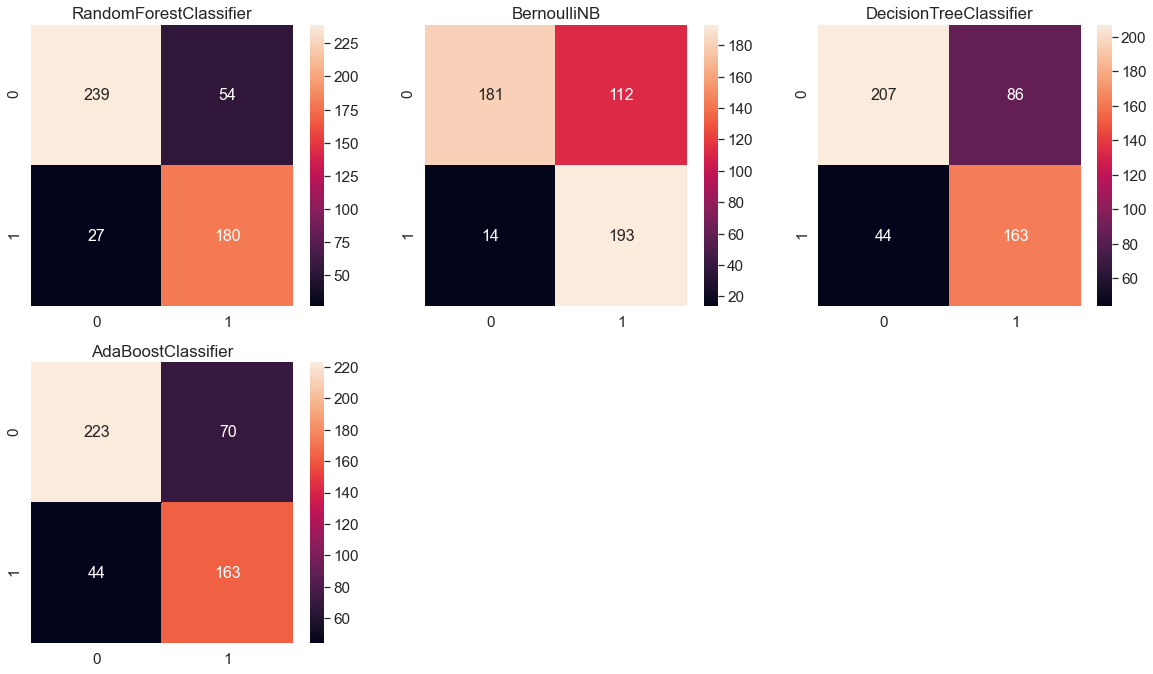

In [17]:
plt.figure(figsize = (20,30))  # width, height
for i in range(len(classifiers1)):
    s = str(classifiers1[i]).find('(')
    conf_matr = confusion_matrix(y1_test, test_preds[i])
    plt.subplot(5, 3, i+1)
    plt.title(str(classifiers1[i])[:s])
    # plt.tight_layout()
    cm_df = pd.DataFrame(conf_matr, index = ['0','1'], columns = ['0','1'])
    seaborn.set(font_scale=1.4)
    seaborn.heatmap(cm_df, fmt='.0f', annot=True,annot_kws={"size": 16})

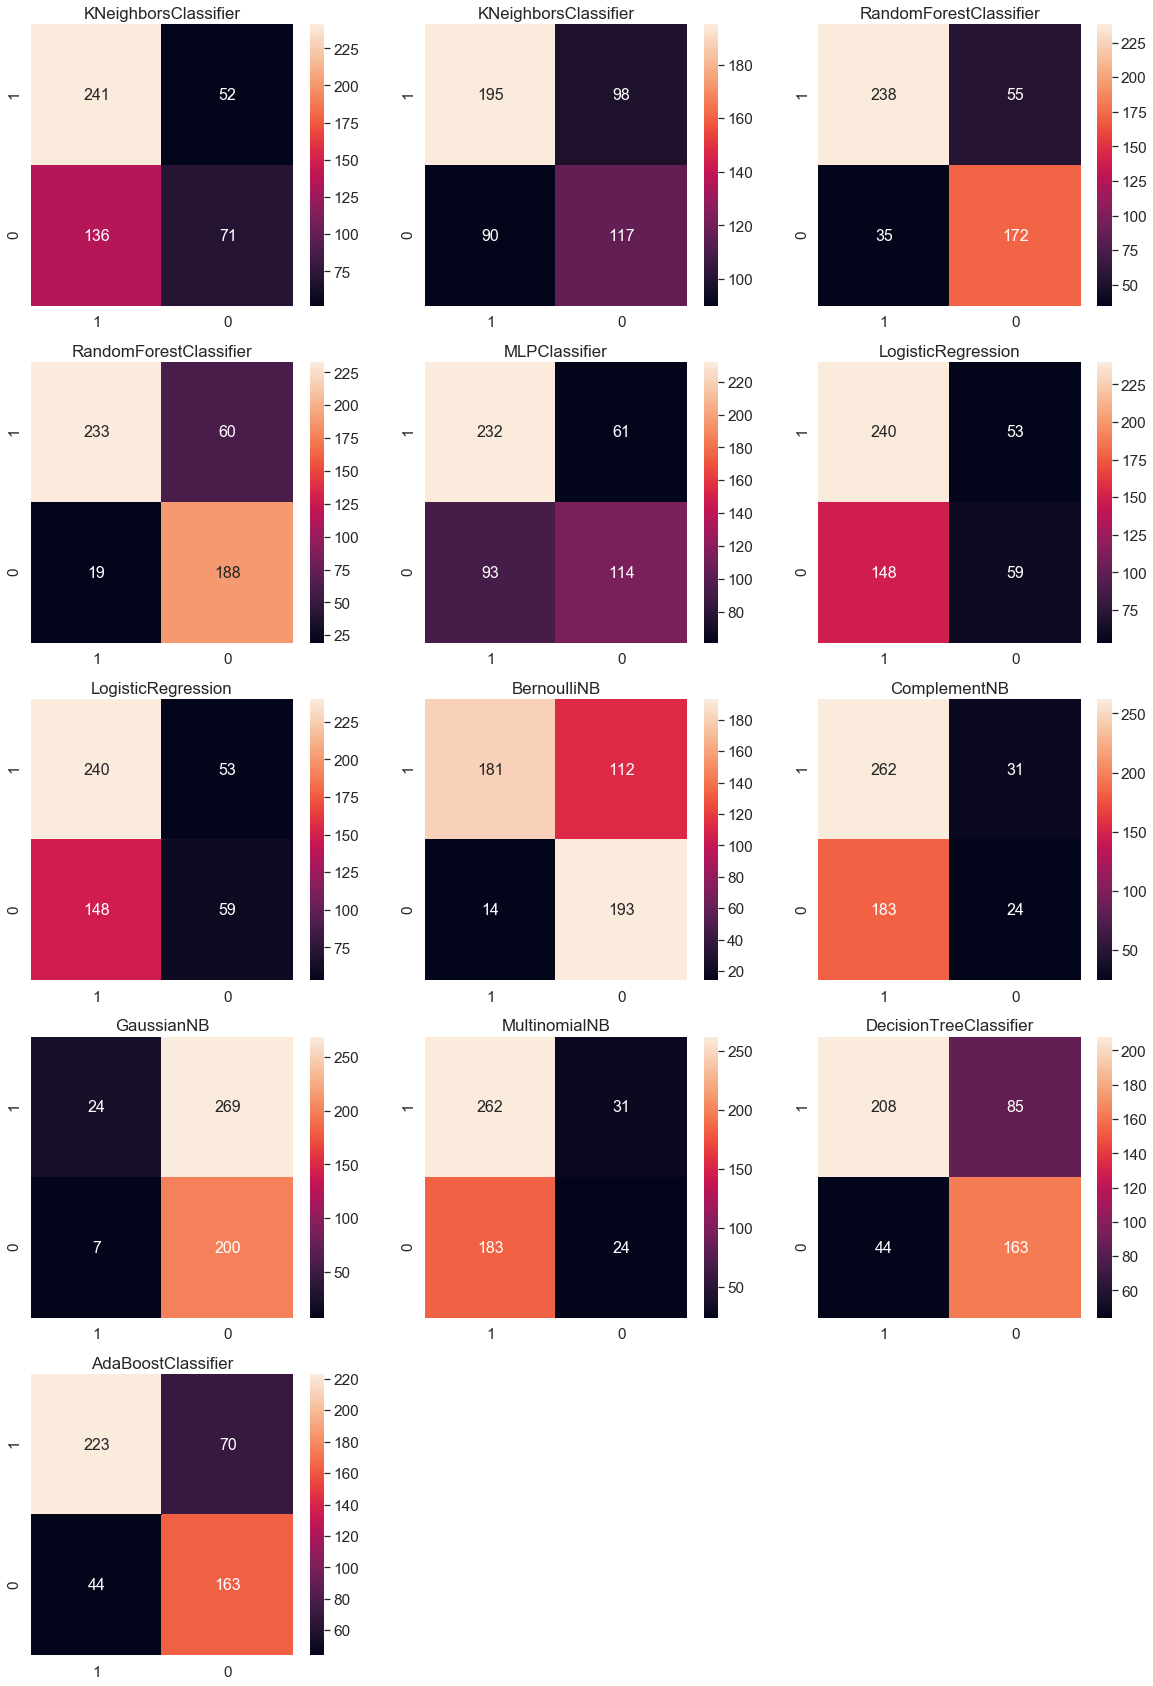

In [53]:
plt.figure(figsize = (20,30))  # width, height
for i in range(len(classifiers1)):
    s = str(classifiers1[i]).find('(')
    conf_matr = confusion_matrix(y1_test, test_preds[i])
    plt.subplot(5, 3, i+1)
    plt.title(str(classifiers1[i])[:s])
    # plt.tight_layout()
    cm_df = pd.DataFrame(conf_matr, index = ['0','1'], columns = ['0','1'])
    seaborn.set(font_scale=1.4)
    seaborn.heatmap(cm_df, fmt='.0f', annot=True,annot_kws={"size": 16})

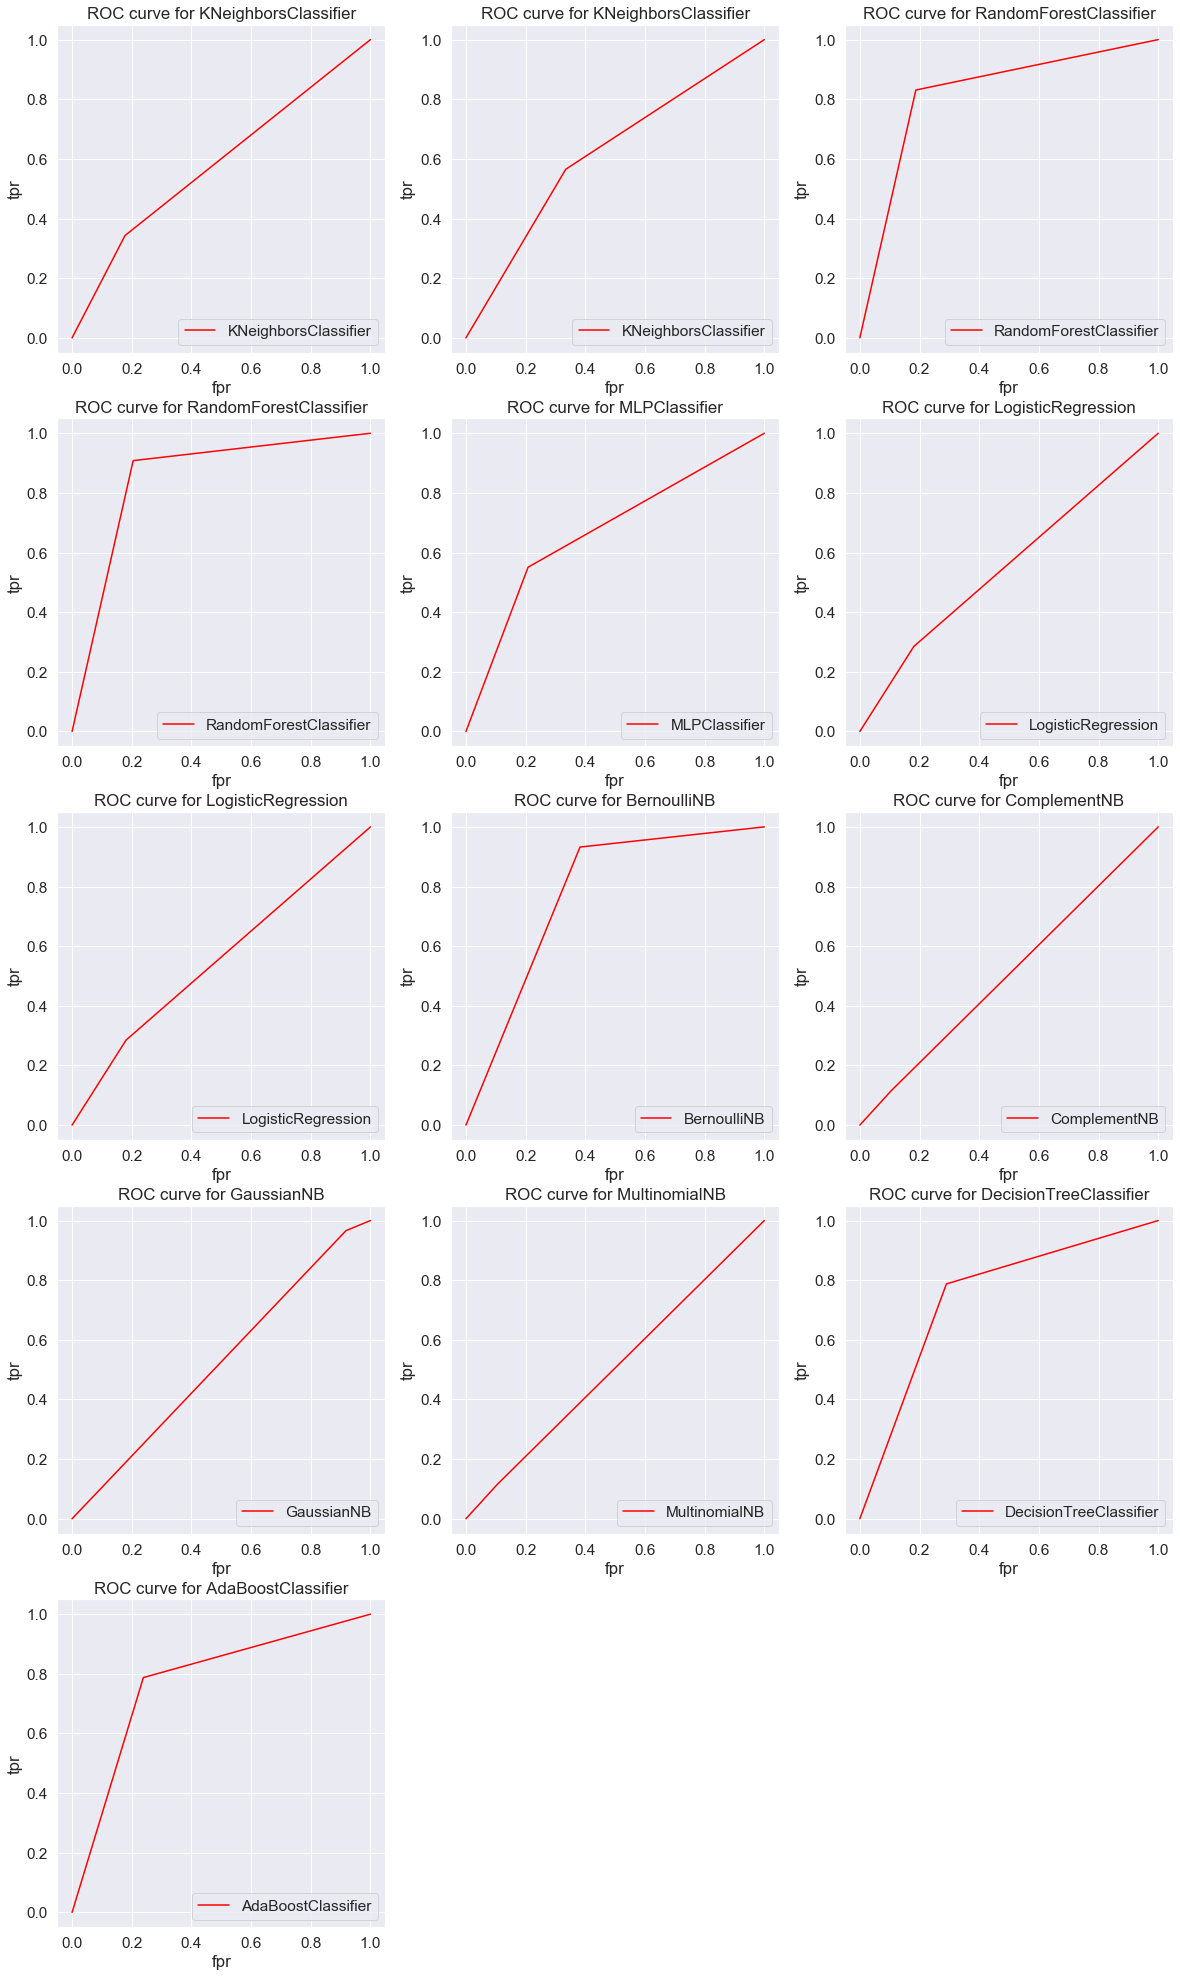

In [56]:
plt.figure(figsize=(20,35))
for i in range(len(classifiers1)):
    s = str(classifiers1[i]).find('(')
    title = 'ROC curve for '+str(classifiers1[i])[:s]
    fpr, tpr, _ = roc_curve(y_true=y1_test, y_score=test_preds[i], drop_intermediate=False)
    plt.subplot(5, 3, i+1)
    plt.plot(fpr, tpr, color='red', label=str(classifiers1[i])[:s])
    plt.legend(loc='lower right')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(title)
plt.show()

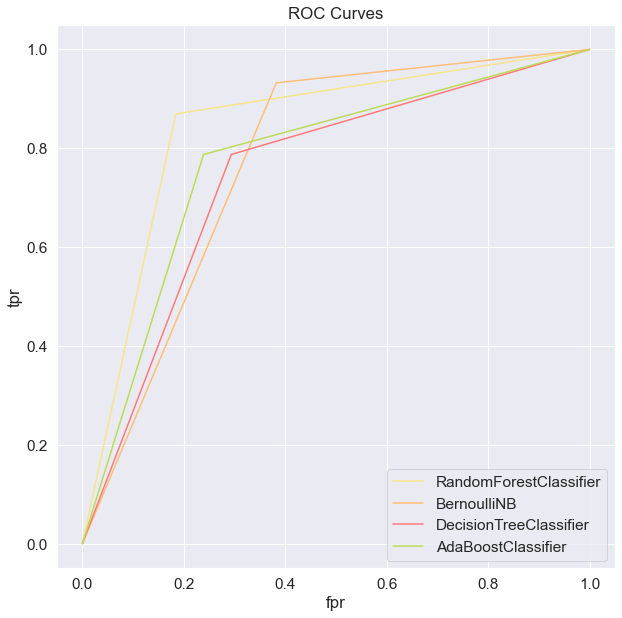

In [16]:
colors = ['#f6e58d', '#ffbe76', '#ff7979', '#badc58', '#be2edd', '#f9ca24', '#f0932b', '#eb4d4b', '#6ab04c', 
         '#c7ecee', '#7ed6df', '#2ed573', '#686de0', '#30336b', '#130f40']
plt.figure(figsize=(10,10))
for i in range(len(classifiers1)):
    s = str(classifiers1[i]).find('(')
    fpr, tpr, _ = roc_curve(y_true=y1_test, y_score=test_preds[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color=colors[i], label=str(classifiers1[i])[:s])
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("ROC Curves")
plt.show()

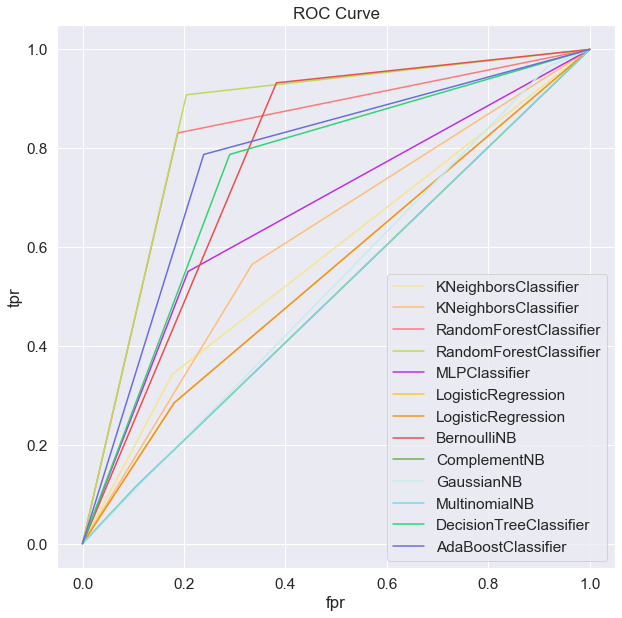

In [70]:
colors = ['#f6e58d', '#ffbe76', '#ff7979', '#badc58', '#be2edd', '#f9ca24', '#f0932b', '#eb4d4b', '#6ab04c', 
         '#c7ecee', '#7ed6df', '#2ed573', '#686de0', '#30336b', '#130f40']
plt.figure(figsize=(10,10))
for i in range(len(classifiers1)):
    s = str(classifiers1[i]).find('(')
    fpr, tpr, _ = roc_curve(y_true=y1_test, y_score=test_preds[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color=colors[i], label=str(classifiers1[i])[:s])
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("ROC Curves")
plt.show()

In [39]:
data1.columns

Index(['Likes', 'Comments', 'Followings', 'Followers', 'MediaCounts',
       'LocationExistence', 'Hashtags', 'Captions', 'LengthOfHashtags',
       'LengthOfCaptions', 'URLInclusion', 'MentionInclusion', 'EmojiCount',
       'EmojiExistence', 'EmojiPortion'],
      dtype='object')

In [17]:
def count_emoji(text):
    emoji_count = 0
    for i in text:
        if i in emoji.UNICODE_EMOJI:
            emoji_count += 1
    return emoji_count

link_list = ["https://www.instagram.com/p/B9V1TVMp-Fy/", 
             "https://www.instagram.com/p/B81UB--I-1n/", 
             "https://www.instagram.com/p/B-Isb-Tg3z7/",
             "https://www.instagram.com/p/B6g8FVBBcGY/", 
             "https://www.instagram.com/p/B-KaFLkgtMD/"]
given_post_link = link_list[4]
post = scrape_post_from_link(given_post_link)[0]
user = scrape_profile(post['user_name'], False)
# pprint(post)

# print(user.keys())
# dict_keys(['username', 'z_posts', 'full_name', 'is_verified', 'id', 'profile_pic_url', 'profile_pic', 'post_count', 
#            'is_private', 'followers', 'following', 'description', 'external_url_01', 'external_url', 'is_business'])

# print(post.keys())
# dict_keys(['caption', 'comment_texts', 'comment_texts_processed', 'comment_users', 'comment_users_verified', 'comments', 'comments_disabled', 
#            'datetime', 'hashtags_cap', 'hashtags_img', 'image_text', 'image_text_processed', 'is_ad', 'is_video', 'likes', 'location', 
#            'mentions_cap', 'mentions_img', 'photo_url', 'post_id', 'post_url', 'shortcode', 'tagged_user_full_name', 'tagged_user_verified', 
#            'tagged_usernames', 'timestamp', 'user_full_name', 'user_id', 'user_name', 'user_post_count', 'user_private', 'user_profile_pic_url', 
#            'user_verified'])

post_arr = []
cols = ['Likes', 'Comments', 'Followings', 'Followers', 'MediaCounts', 'LocationExistence', 'Hashtags', 'Captions', 'LengthOfHashtags', 
        'LengthOfCaptions', 'URLInclusion', 'MentionInclusion', 'EmojiCount', 'EmojiExistence', 'EmojiPortion']

hashtags = ""
for i in list(post['hashtags_cap']):
    hashtags += "#" + i + " "
for i in list(post['hashtags_img']):
    hashtags += "#" + i + " "
hashtags = hashtags.strip()

post_arr += [post['likes'],
             post['comments'],
             user['following'],
             user['followers'],
             post['user_post_count'],
             1 - int(post['location'] == 'None'),
             hashtags,
             post['caption'],
            ]
lenhashs = 0
for i in post['hashtags_cap']:
    lenhashs += len(i)
for i in post['hashtags_img']:
    lenhashs += len(i)
post_arr += [lenhashs,
             len(post['caption']),
             int(len(re.findall(r'(https?://\S+)', post['caption'])) > 0),
             int(len(list(post['mentions_cap']) + list(post['mentions_img'])) > 0),
             count_emoji(post['caption'] + post['image_text']),
            ]
if post_arr[-1] > 0:
    post_arr += [1]
else:
    post_arr += [0]

post_arr += [ post_arr[-2] / ( len(post['caption']) + len(post['image_text']) ) ]
# print(post_arr)
given_post_df = pd.DataFrame([post_arr], columns=cols)
given_post_df

Likes  Comments  Followings  Followers  MediaCounts  LocationExistence  \
0  640296      8167         224  343625334         6302                  1   

               Hashtags                                           Captions  \
0  #ThisWeekOnInstagram  Thirteen-year-old rapper and entertainer Alaya...   

   LengthOfHashtags  LengthOfCaptions  URLInclusion  MentionInclusion  \
0                19               626             0                 1   

   EmojiCount  EmojiExistence  EmojiPortion  
0           1               1      0.001597

In [18]:
len_arr = [29054, 44137]
arr = [[]]

arr2 = vectorizer.transform(given_post_df['Hashtags']).toarray()
for j in range(len(arr2)):
    arr[j] += arr2[j, :].tolist()
print(len(arr[0]))

arr2 = vectorizer2.transform(given_post_df['Captions']).toarray()
for j in range(len(arr2)):
    arr[j] += arr2[j, :].tolist()
print(len(arr[0]))
given_post_test = pd.DataFrame(arr)

for i in given_post_df.columns:
    if i != 'Hashtags' and i != 'Captions':
        given_post_test[i] = given_post_df[i]
given_post_test

29054
73191


0  1  2  3  4  5  6  7  8  9  ...  Followers  MediaCounts  \
0  0  0  0  0  0  0  0  0  0  0  ...  343625334         6302   

   LocationExistence  LengthOfHashtags  LengthOfCaptions  URLInclusion  \
0                  1                19               626             0   

   MentionInclusion  EmojiCount  EmojiExistence  EmojiPortion  
0                 1           1               1      0.001597  

[1 rows x 73204 columns]

In [19]:
predictions = []
for i in classifiers1:
    predictions += i.predict(given_post_test).tolist()
print(predictions)
print(sum(predictions)/len(predictions))

[0, 0, 1, 1]
0.5


# DATABASE 2 (From KAGGLE)
###### => Useless

# DATABASE 3 (From KAGGLE)
![title](images/database3_desc.jpg)

In [18]:
data3_train = pd.read_csv('databases/database3/train.csv')
data3_test = pd.read_csv('databases/database3/test.csv')

y3_train = data3_train['fake'].copy()
data3_train = data3_train.drop(columns=['fake'])

y3_test = data3_test['fake'].copy()
data3_test = data3_test.drop(columns=['fake'])
print(data3_train.shape, y3_train.shape, data3_test.shape, y3_test.shape)
print(data3_train.columns)
data3_train.describe()

(576, 11) (576,) (120, 11) (120,)
Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows'],
      dtype='object')


profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean      0.701389              0.163837        1.460069   
std       0.458047              0.214096        1.052601   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.310000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length  external URL  \
count            576.000000      576.000000          576.000000    576.000000   
mean               0.036094        0.034722           22.623264      0.116319   
std                0.125121        0.183234           37.702987      0.320886   
min                0.000000        0.000000            0.000000      0.000000   
25%                0.000000        0.000000            0.000000      0.000000   
50%                0.000000        0.000000            0.000000      0.000000   
75%                0.000000        0.000000           34.000000      0.000000   
max                1.000000        1.000000          150.000000      1.000000   

          private       #posts    #followers     #follows  
count  576.000000   576.000000  5.760000e+02   576.000000  
mean     0.381944   107.489583  8.530724e+04   508.381944  
std      0.486285   402.034431  9.101485e+05   917.981239  
min      0.000000     0.000000  0.000000e+00     0.000000  
25%      0.000000     0.000000  3.900000e+01    57.500000  
50%      0.000000     9.000000  1.505000e+02   229.500000  
75%      1.000000    81.500000  7.160000e+02   589.500000  
max      1.000000  7389.000000  1.533854e+07  7500.000000

In [48]:
data3_train 

profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==username  description length  external URL  private  #posts  \
0                 0                  53             0        0      32   
1                 0                  44             0        0     286   
2                 0                   0             0        1      13   
3                 0                  82             0        0     679   
4                 0                   0             0        1       6   
..              ...                 ...           ...      ...     ...   
571               0                   0             0        0      33   
572               0                  21             0        0      44   
573               0                   0             0        0       4   
574               0                  11             0        0       0   
575               0                   0             0        0       2   

     #followers  #follows  
0          1000       955  
1          2740       533  
2           159        98  
3           414       651  
4           151       126  
..          ...       ...  
571         166       596  
572          66        75  
573          96       339  
574          57        73  
575         150       487  

[576 rows x 11 columns]

In [49]:
data3_test.describe()

profile pic  nums/length username  fullname words  \
count   120.000000            120.000000      120.000000   
mean      0.758333              0.179917        1.550000   
std       0.429888              0.241492        1.187116   
min       0.000000              0.000000        0.000000   
25%       1.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.330000        2.000000   
max       1.000000              0.890000        9.000000   

       nums/length fullname  name==username  description length  external URL  \
count            120.000000      120.000000          120.000000    120.000000   
mean               0.071333        0.041667           27.200000      0.100000   
std                0.209429        0.200664           42.588632      0.301258   
min                0.000000        0.000000            0.000000      0.000000   
25%                0.000000        0.000000            0.000000      0.000000   
50%                0.000000        0.000000            0.000000      0.000000   
75%                0.000000        0.000000           45.250000      0.000000   
max                1.000000        1.000000          149.000000      1.000000   

          private       #posts    #followers     #follows  
count  120.000000   120.000000  1.200000e+02   120.000000  
mean     0.308333    82.866667  4.959472e+04   779.266667  
std      0.463741   230.468136  3.816126e+05  1409.383558  
min      0.000000     0.000000  0.000000e+00     1.000000  
25%      0.000000     1.000000  6.725000e+01   119.250000  
50%      0.000000     8.000000  2.165000e+02   354.500000  
75%      1.000000    58.250000  5.932500e+02   668.250000  
max      1.000000  1879.000000  4.021842e+06  7453.000000

In [50]:
data3_test

profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.33               1                  0.33   
1              1                  0.00               5                  0.00   
2              1                  0.00               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.50               1                  0.00   
..           ...                   ...             ...                   ...   
115            1                  0.29               1                  0.00   
116            1                  0.40               1                  0.00   
117            1                  0.00               2                  0.00   
118            0                  0.17               1                  0.00   
119            1                  0.44               1                  0.00   

     name==username  description length  external URL  private  #posts  \
0                 1                  30             0        1      35   
1                 0                  64             0        1       3   
2                 0                  82             0        1     319   
3                 0                 143             0        1     273   
4                 0                  76             0        1       6   
..              ...                 ...           ...      ...     ...   
115               0                   0             0        0      13   
116               0                   0             0        0       4   
117               0                   0             0        0       3   
118               0                   0             0        0       1   
119               0                   0             0        0       3   

     #followers  #follows  
0           488       604  
1            35         6  
2           328       668  
3         14890      7369  
4           225       356  
..          ...       ...  
115         114       811  
116         150       164  
117         833      3572  
118         219      1695  
119          39        68  

[120 rows x 11 columns]

In [51]:
y3_0count = y3_test.tolist().count(0)
y3_1count = y3_test.tolist().count(1)
y3_total = y3_1count + y3_0count
print("Test data:")
print("Count of 0s:", y3_0count, " => ", "{0:.2f} %".format(y3_0count*100/y3_total))
print("Count of 1s:", y3_1count, " => ", "{0:.2f} %".format(y3_1count*100/y3_total))
print("Total:", y3_total)

print()

y3_0count = y3_train.tolist().count(0)
y3_1count = y3_train.tolist().count(1)
y3_total = y3_1count + y3_0count
print("Train data:")
print("Count of 0s:", y3_0count, " => ", "{0:.2f} %".format(y3_0count*100/y3_total))
print("Count of 1s:", y3_1count, " => ", "{0:.2f} %".format(y3_1count*100/y3_total))
print("Total:", y3_total)

print()

y3_0count = y3_train.tolist().count(0) + y3_test.tolist().count(0)
y3_1count = y3_train.tolist().count(1) + y3_test.tolist().count(1)
y3_total = y3_1count + y3_0count
print("Total data:")
print("Count of 0s:", y3_0count, " => ", "{0:.2f} %".format(y3_0count*100/y3_total))
print("Count of 1s:", y3_1count, " => ", "{0:.2f} %".format(y3_1count*100/y3_total))
print("Total:", y3_total)

Test data:
Count of 0s: 60  =>  50.00 %
Count of 1s: 60  =>  50.00 %
Total: 120

Train data:
Count of 0s: 288  =>  50.00 %
Count of 1s: 288  =>  50.00 %
Total: 576

Total data:
Count of 0s: 348  =>  50.00 %
Count of 1s: 348  =>  50.00 %
Total: 696


## Don't run the next cell

In [151]:
flag = 0
if flag == 0:
    classifiers3 = [
        KNeighborsClassifier(2),
        KNeighborsClassifier(3),
        RandomForestClassifier(n_estimators=10),
        RandomForestClassifier(n_estimators=100),
        MLPClassifier(alpha=1, max_iter=1000),
        LogisticRegression(tol=0.01),
        LogisticRegression(penalty='l2', tol=0.01),
        BernoulliNB(),
        ComplementNB(),
        GaussianNB(),
        MultinomialNB(),
        SVC(kernel='poly', degree=2),
        SVC(kernel='rbf', gamma='scale'),
        SVC(kernel='linear'),
        DecisionTreeClassifier(max_depth=5),
        AdaBoostClassifier()]
    for i in classifiers3:
        start = time.time()
        try:
            i.fit(data3_train, y3_train)
        except Exception as e:
            print(e, i)
        end = time.time()
        e = str(i).find("(")
        print("{0:.2f} minutes".format( (end-start)/60 ), "-", str(i)[:e])
    with open("pickle_files/classifiers3", 'wb') as file:
        pickle.dump(classifiers3, file)
    print("classifiers3 pickle file saved.")
elif flag == 1:
    with open("pickle_files/classifiers3", 'rb') as file:
        classifiers3 = pickle.load(file)
    print("classifiers3 loaded from pickle file.")

0.00 minutes - KNeighborsClassifier
0.00 minutes - KNeighborsClassifier
0.00 minutes - RandomForestClassifier
0.00 minutes - RandomForestClassifier
0.01 minutes - MLPClassifier
0.00 minutes - LogisticRegression
0.00 minutes - LogisticRegression
0.00 minutes - BernoulliNB
0.00 minutes - ComplementNB
0.00 minutes - GaussianNB
0.00 minutes - MultinomialNB
0.00 minutes - SVC
0.00 minutes - SVC
0.90 minutes - SVC
0.00 minutes - DecisionTreeClassifier
0.00 minutes - AdaBoostClassifier
classifiers3 pickle file saved.


In [19]:
with open("pickle_files/classifiers3", 'rb') as file:
    classifiers3 = pickle.load(file)
print("classifiers3 loaded from pickle file.")

classifiers3 loaded from pickle file.


In [20]:
for i in classifiers3:
    test_pred = i.predict(data3_test)
    train_pred = i.predict(data3_train)
    e = str(i).find("(")
    print(str(i)[:e])
    print("Train Accuracy:", "{0:.3f}".format(accuracy_score(y3_train, train_pred)))
    print("Training F1 Score:", "{0:.3f}".format(f1_score(y3_train, train_pred)))
    print("Test Accuracy:", "{0:.3f}".format(accuracy_score(y3_test, test_pred)))
    print("Testing F1 Score:", "{0:.3f}".format(f1_score(y3_test, test_pred)))
    print()

KNeighborsClassifier
Train Accuracy: 0.944
Training F1 Score: 0.941
Test Accuracy: 0.850
Testing F1 Score: 0.833

KNeighborsClassifier
Train Accuracy: 0.943
Training F1 Score: 0.943
Test Accuracy: 0.858
Testing F1 Score: 0.852

RandomForestClassifier
Train Accuracy: 0.990
Training F1 Score: 0.989
Test Accuracy: 0.917
Testing F1 Score: 0.912

RandomForestClassifier
Train Accuracy: 1.000
Training F1 Score: 1.000
Test Accuracy: 0.933
Testing F1 Score: 0.933

MLPClassifier
Train Accuracy: 0.938
Training F1 Score: 0.939
Test Accuracy: 0.908
Testing F1 Score: 0.909

LogisticRegression
Train Accuracy: 0.915
Training F1 Score: 0.915
Test Accuracy: 0.908
Testing F1 Score: 0.912

LogisticRegression
Train Accuracy: 0.915
Training F1 Score: 0.915
Test Accuracy: 0.908
Testing F1 Score: 0.912

BernoulliNB
Train Accuracy: 0.885
Training F1 Score: 0.883
Test Accuracy: 0.883
Testing F1 Score: 0.881

ComplementNB
Train Accuracy: 0.559
Training F1 Score: 0.678
Test Accuracy: 0.525
Testing F1 Score: 0.663

In [22]:
len(classifiers3)

16

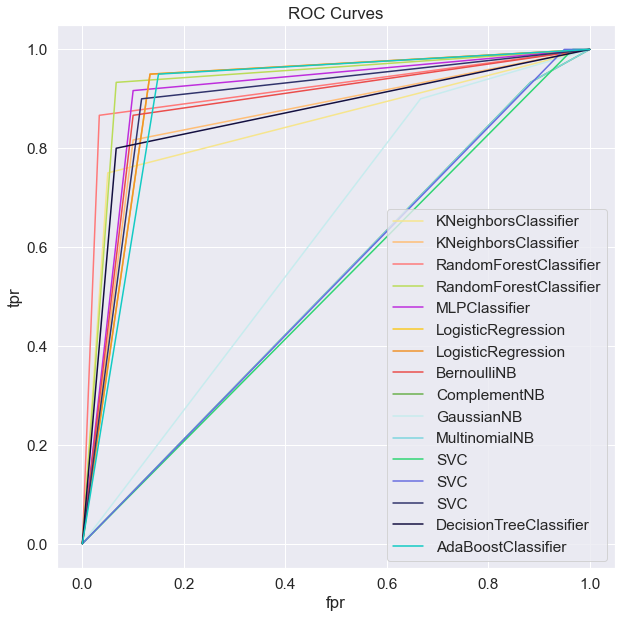

In [23]:
colors = ['#f6e58d', '#ffbe76', '#ff7979', '#badc58', '#be2edd', '#f9ca24', '#f0932b', '#eb4d4b', '#6ab04c', 
         '#c7ecee', '#7ed6df', '#2ed573', '#686de0', '#30336b', '#130f40', '#12CBC4']
plt.figure(figsize=(10,10))
for i in range(len(classifiers3)):
    s = str(classifiers3[i]).find('(')
    fpr, tpr, _ = roc_curve(y_true=y3_test, y_score=classifiers3[i].predict(data3_test), drop_intermediate=False)
    plt.plot(fpr, tpr, color=colors[i], label=str(classifiers3[i])[:s])
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("ROC Curves")
plt.show()

In [53]:
data3_train.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows'],
      dtype='object')

In [54]:
def count_digits(string):
    count = 0
    for i in range(10):
        count += string.count(str(i))
    return count

given_user = "testtt_acccc"
user = scrape_profile(given_user)

# print(user.keys())
# dict_keys(['username', 'z_posts', 'full_name', 'is_verified', 'id', 'profile_pic_url', 'profile_pic', 'post_count', 
#            'is_private', 'followers', 'following', 'description', 'external_url_01', 'external_url', 'is_business'])
user_arr = []
cols = ['profile pic', 'nums/length username', 'fullname words', 
        'nums/length fullname', 'name==username', 'description length',
        'external URL', 'private', '#posts', '#followers', '#follows']

user_arr += [user['profile_pic'], 
             count_digits(user['username']),
             len(user['full_name'].strip().split()),
             count_digits(user['full_name']),
             int(str(user['username']) == str(user['full_name'])),
             len(user['description']),
             user['external_url_01'],
             int(user['is_private']),
             int(user['post_count']),
             int(user['followers']),
             int(user['following'])
            ]
# print(user_arr)
given_user_df = pd.DataFrame([user_arr], columns=cols)
given_user_df

profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                     0               2                     0   

   name==username  description length  external URL  private  #posts  \
0               0                  16             0        0       1   

   #followers  #follows  
0           0         1

In [55]:
predictions = []
for i in classifiers3:
    predictions += i.predict(given_user_df).tolist()
print(predictions)
print(sum(predictions)/len(predictions))

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
0.875


# DATABASE 4
## Turned out to be the same as database1

# DATABASE 5
## Twitter data, not Instagram's, might plan on using it in the future.

# DATABASE 6 (Self Collected)

## Don't run the next cell

In [12]:
# arr = []
# for i in range(len(_df)):
#     try:
#         post = scrape_post_from_link(_df['Link'][i])
#     except Exception as e:
#         print(e)
#         continue
#     temp_arr = [_df['isClickbait'][i], _df['Link'][i]]
#     for j in post[0].values():
#         temp_arr += [j]
#     arr += [temp_arr]

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'PostPage'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'


TypeError: can only concatenate list (not "dict_keys") to list

In [40]:
flag = 1
with open('pickle_files/arr', 'rb') as file:
    arr = pickle.load(file)
if flag == 0:
    df6 = pd.DataFrame(arr, columns=['isClickbait', 'Link'] + list(post[0].keys()))
    df6.to_csv('databases/database6/data.csv', index=False)
elif flag == 1:
    df6 = pd.read_csv('databases/database6/data.csv')
df6 = df6.fillna('')
df6

isClickbait                                     Link  \
0               1   https://www.instagram.com/p/5uvYxcgsYL   
1               1   https://www.instagram.com/p/6gU1ybIsQ4   
2               1   https://www.instagram.com/p/6n1sYNMGa0   
3               1   https://www.instagram.com/p/65IX9Gk-tm   
4               1   https://www.instagram.com/p/65nyRpE-si   
...           ...                                      ...   
1837            0  https://www.instagram.com/p/B-KrGOPh9oL   
1838            0  https://www.instagram.com/p/B-KrGRMhHLd   
1839            0  https://www.instagram.com/p/B-KrGWFCbxp   
1840            0  https://www.instagram.com/p/B-KrGsIDAfk   
1841            0  https://www.instagram.com/p/B-KrGu8BUq3   

                                           hashtags_cap        mentions_cap  \
0     ['SuperKingRecipes', 'SuperKing', 'Avocados', ...                  []   
1     ['freestuff', 'freeiphone', 'freeiphone5', 'fr...                  []   
2     ['macbook', 'freemacbook', 'sweepstakes', 'sim...  ['toptencampaign']   
3                  ['NationalBurgerDay', 'GeicoSummer']      ['quigonjeks']   
4                        ['GeicoSummer', 'GeicoSummer']    ['goobersmax35']   
...                                                 ...                 ...   
1837  ['walk', 'beach', 'isolation', 'corona', 'ocea...                  []   
1838  ['eastbourne', 'eastbourne_insta', 'eastsussex...                  []   
1839  ['models', 'model', 'modela', 'modelo', 'model...                  []   
1840                                                 []                  []   
1841  ['thankful', 'vacation', 'holiday', 'love', 'h...                  []   

        shortcode                                          photo_url  \
0      5uvYxcgsYL  https://scontent-del1-1.cdninstagram.com/v/t51...   
1      6gU1ybIsQ4  https://scontent-del1-1.cdninstagram.com/v/t51...   
2      6n1sYNMGa0  https://scontent-del1-1.cdninstagram.com/v/t51...   
3      65IX9Gk-tm  https://scontent-del1-1.cdninstagram.com/v/t51...   
4      65nyRpE-si  https://scontent-del1-1.cdninstagram.com/v/t51...   
...           ...                                                ...   
1837  B-KrGOPh9oL  https://scontent-del1-1.cdninstagram.com/v/t51...   
1838  B-KrGRMhHLd  https://scontent-del1-1.cdninstagram.com/v/t51...   
1839  B-KrGWFCbxp  https://scontent-del1-1.cdninstagram.com/v/t51...   
1840  B-KrGsIDAfk  https://scontent-del1-1.cdninstagram.com/v/t51...   
1841  B-KrGu8BUq3  https://scontent-del1-1.cdninstagram.com/v/t51...   

                                          comment_users  \
0                 ['closetchipsin', 'superkingmarkets']   
1     ['getafreeiphone6today', 'mimosox', 'anvanderi...   
2                                                    []   
3     ['abc7ny', 'acciolivia', 'gratefulmatt', 'mrss...   
4     ['abc7ny', 'maribelmtr', 'nika35', 'b_weill', ...   
...                                                 ...   
1837                                                 []   
1838                               ['when_caesar_says']   
1839                                                 []   
1840             ['nastushkaa__2001', 'vanessacordoba']   
1841  ['s.locke__', 'schirin_vika', 'cinditschka', '...   

                                          comment_texts  \
0     ['avocado mashed potatoes!', '@closetchipsin t...   
1     ['Significant!', 'Green?', 'Fake', '@blackking...   
2                                                    []   
3     ['#contest #free #freemacbook #macbookair #app...   
4     ['#free #freebie #freestuff #freemacbook #cont...   
...                                                 ...   
1837                                                 []   
1838                       ['Stand fast! Keep safe! 💜']   
1839                                                 []   
1840                                      ['Вау😍', '😍']   
1841  ['Ihr beiden Süßen 🔥😍', 'Ihr süßen 😘', 'Was fü...   

                             

In [41]:
print(df6.columns)
print(len(df6.columns), len(arr[0]))

Index(['isClickbait', 'Link', 'hashtags_cap', 'mentions_cap', 'shortcode',
       'photo_url', 'comment_users', 'comment_texts', 'comment_users_verified',
       'comment_texts_processed', 'caption', 'post_url', 'post_id',
       'user_name', 'user_id', 'user_full_name', 'user_verified',
       'user_private', 'user_profile_pic_url', 'user_post_count', 'is_ad',
       'is_video', 'location', 'timestamp', 'datetime', 'comments_disabled',
       'likes', 'comments', 'tagged_usernames', 'tagged_user_full_name',
       'tagged_user_verified', 'image_text', 'hashtags_img', 'mentions_img',
       'image_text_processed'],
      dtype='object')
35 35


In [42]:
y6 = df6['isClickbait'].copy()

mentions_cap = []
hashtags_cap = []
verified_user_commented = []
username_full_name = []
location_in_post = []
verified_user_tagged = []
dollar_in_caption = []

for i in range(len(df6)):
    mentions_cap += [len(df6['mentions_cap'][i])]
    hashtags_cap += [len(df6['hashtags_cap'][i])]
    if True in list(df6['comment_users_verified'][i]):
        verified_user_commented += [1]
    else:
        verified_user_commented += [0]
    if str(df6['user_name'][i]).strip().lower() == str(df6['user_full_name'][i]).strip().lower():
        username_full_name += [1]
    else:
        username_full_name += [0]
    if df6['location'][i] is None:
        location_in_post += [0]
    else:
        location_in_post += [1]
    if True in list(df6['tagged_user_verified'][i]):
        verified_user_tagged += [1]
    else:
        verified_user_tagged += [0]
    if '$' in df6['caption'][i]:
        dollar_in_caption += [1]
    else:
        dollar_in_caption += [0]
    
df6 = df6.drop(columns=['isClickbait', 'Link', 'hashtags_cap', 'mentions_cap', 'shortcode', 'photo_url', 
                  'comment_users', 'comment_texts', 'comment_users_verified', 'comment_texts_processed', 
                  'post_url', 'user_full_name', 'user_profile_pic_url', 'location', 'datetime', 
                  'tagged_usernames', 'tagged_user_full_name', 'tagged_user_verified', 'hashtags_img',
                  'mentions_img', 'image_text', 'image_text_processed'])
df6['mentions_cap'] = mentions_cap
df6['hashtags_cap'] = hashtags_cap
df6['verified_user_commented'] = verified_user_commented
df6['username_fullname'] = username_full_name
df6['loc_in_post'] = location_in_post
df6['verified_user_tagged'] = verified_user_tagged
df6['dollar_in_caption'] = dollar_in_caption

df6['user_verified'] = df6['user_verified'].astype(int)
df6['user_private'] = df6['user_private'].astype(int)
df6['is_ad'] = df6['is_ad'].astype(int)
df6['is_video'] = df6['is_video'].astype(int)
df6['comments_disabled'] = df6['comments_disabled'].astype(int)

df6

caption              post_id  \
0     Avocados are only $.79 each this week! What's ...  1039976974514308619   
1     Just got a few more Iphone 5c's in!\nCheck bio...  1053933970009539640   
2     Win the new MacBook by taking a simple survey....  1056048783754815156   
3     Oh, @quigonjeks you're making us hungry!! How ...  1060916017751124838   
4     SUMMMMMMMER! 🐠🌸💦 Thanks for your submission in...  1061054165953014562   
...                                                 ...                  ...   
1837  today’s walk✨#walk #beach #isolation #corona #...  2272818505571621387   
1838  Eastbourne Beach. Taken on the state permitted...  2272818508742292189   
1839  Bn #models #model #modela #modelo #modella #mo...  2272818513985518697   
1840                  Lenny Kravitz - I belong to you 🎶  2272818537658320868   
1841  ขอบคุณ - Danke, für diese wundervolle gemeinsa...  2272818540677778103   

              user_name      user_id  user_verified  user_private  \
0      superkingmarkets    239205176              0             0   
1        freea.pple2015   2100757224              0             0   
2        toptencampaign   2115933096              0             0   
3                abc7ny     52491273              1             0   
4                abc7ny     52491273              1             0   
...                 ...          ...            ...           ...   
1837   _elliechristiane   8891509006              0             0   
1838  sean.firth.photos   4300630018              0             0   
1839          modabarce   8431715290              0             0   
1840      katherines_ph  11896170604              0             0   
1841     whatkatyloves_   1481565718              0             0   

      user_post_count  is_ad  is_video   timestamp  comments_disabled  likes  \
0                1631      0         0  1438194937                  0   2176   
1                   3      0         0  1439858741                  0     23   
2                  13      0         0  1440110846                  0     20   
3               12768      0         0  1440691066                  0    314   
4               12768      0         0  1440707535                  0    307   
...               ...    ...       ...         ...                ...    ...   
1837              380      0         0  1585161101                  0     62   
1838              144      0         0  1585161101                  0     84   
1839              346      0         0  1585161102                  0      6   
1840              151      0         0  1585161104                  0    406   
1841              170      0         0  1585161105                  0    183   

      comments  mentions_cap  hashtags_cap  verified_user_commented  \
0            2             2           139                        0   
1            5             2           219                        0   
2            0            18           145                        0   
3           22            14            36                        0   
4           16            16            30                        0   
...        ...           ...           ...                      ...   
1837         0             2            91                        0   
1838         1             2           370                        0   
1839         0             2           333                        0   
1840         2             2             2                        0   
1841         7             2           173                        0   

      username_fullname  loc_in_post  verified_user_tagged  dollar_in_caption  
0                     0            1                     0                  1  
1                     0            1                     0                  0  
2                     0            1                     0                  0  
3                     1            1                     0                  0  
4                     1            1        

In [43]:
vectorizer6_1 = CountVectorizer(stop_words='english')
vectorizer6_1.fit(df6.caption)

vectorizer6_2 = CountVectorizer(stop_words='english')
vectorizer6_2.fit(df6.user_name)

arr = []
for i in range(len(df6)):
    arr += [[]]

arr2 = vectorizer6_1.transform(df6['caption']).toarray()
for j in range(len(arr2)):
    arr[j] += arr2[j, :].tolist()
print(len(arr2[0]))

arr2 = vectorizer6_2.transform(df6['user_name']).toarray()
for j in range(len(arr2)):
    arr[j] += arr2[j, :].tolist()
print(len(arr2[0]))

df6_train = pd.DataFrame(arr)

for i in df6.columns:
    if i != 'user_name' and i != 'caption':
        df6_train[i] = df6[i]
df6_train

16868
1231


0  1  2  3  4  5  6  7  8  9  ...  comments_disabled  likes  comments  \
0     0  0  0  0  0  0  0  0  0  0  ...                  0   2176         2   
1     0  0  0  0  0  0  0  0  0  0  ...                  0     23         5   
2     0  0  0  0  0  0  0  0  0  0  ...                  0     20         0   
3     0  0  0  0  0  0  0  0  0  0  ...                  0    314        22   
4     0  0  0  0  0  0  0  0  0  0  ...                  0    307        16   
...  .. .. .. .. .. .. .. .. .. ..  ...                ...    ...       ...   
1837  0  0  0  0  0  0  0  0  0  0  ...                  0     62         0   
1838  0  0  0  0  0  0  0  0  0  0  ...                  0     84         1   
1839  0  0  0  0  0  0  0  0  0  0  ...                  0      6         0   
1840  0  0  0  0  0  0  0  0  0  0  ...                  0    406         2   
1841  0  0  0  0  0  0  0  0  0  0  ...                  0    183         7   

      mentions_cap  hashtags_cap  verified_user_commented  username_fullname  \
0                2           139                        0                  0   
1                2           219                        0                  0   
2               18           145                        0                  0   
3               14            36                        0                  1   
4               16            30                        0                  1   
...            ...           ...                      ...                ...   
1837             2            91                        0                  0   
1838             2           370                        0                  0   
1839             2           333                        0                  0   
1840             2             2                        0                  0   
1841             2           173                        0                  0   

      loc_in_post  verified_user_tagged  dollar_in_caption  
0               1                     0                  1  
1               1                     0                  0  
2               1                     0                  0  
3               1                     0                  0  
4               1                     0                  0  
...           ...                   ...                ...  
1837            1                     0                  0  
1838            1                     0                  0  
1839            1                     0                  0  
1840            1                     0                  0  
1841            1                     0                  0  

[1842 rows x 18117 columns]

In [44]:
with open('pickle_files/vectorizer6_1', 'wb') as file:
    pickle.dump(vectorizer6_1, file)
with open('pickle_files/vectorizer6_2', 'wb') as file:
    pickle.dump(vectorizer6_2, file)

## Don't run the next cell

In [45]:
flag = 0
# index = 0
if flag == 0:
    classifiers6 = [
# #         KNeighborsClassifier(2),
# #         KNeighborsClassifier(8),
        RandomForestClassifier(n_estimators=8),
        RandomForestClassifier(n_estimators=200),
# #         MLPClassifier(alpha=1, max_iter=500),
#         LogisticRegression(tol=0.01),
#         LogisticRegression(penalty='l2', tol=0.01),
        BernoulliNB(),
#         ComplementNB(),
#         GaussianNB(),
#         MultinomialNB(),
# #         SVC(kernel='poly', degree=2),
# #         SVC(kernel='rbf', gamma='scale'),
# #         SVC(kernel='linear'),
        DecisionTreeClassifier(max_depth=6),
        AdaBoostClassifier()]
    for i in classifiers6:
        start = time.time()
        try:
            i.fit(df6_train, y6)
        except Exception as e:
            print(e, i)
        end = time.time()
        e = str(i).find("(")
        # with open("pickle_files/classifiers6_"+str(index)+str(i)[:e], 'wb') as file:
            # pickle.dump(i, file)
        # index+=1
        print("{0:.2f} minutes".format( (end-start)/60 ), "-", str(i)[:e])
    with open("pickle_files/classifiers6", 'wb') as file:
        pickle.dump(classifiers6, file)
    print("classifiers6 pickle file saved.")
elif flag == 1:
    with open("pickle_files/classifiers6", 'rb') as file:
        classifiers6 = pickle.load(file)
    print("classifiers6 loaded from pickle file.")

0.01 minutes - RandomForestClassifier
0.14 minutes - RandomForestClassifier
0.02 minutes - BernoulliNB
0.02 minutes - DecisionTreeClassifier
0.44 minutes - AdaBoostClassifier
classifiers6 pickle file saved.


In [46]:
with open("pickle_files/classifiers6", 'rb') as file:
    classifiers6 = pickle.load(file)
print("classifiers6 loaded from pickle file.")

classifiers6 loaded from pickle file.


In [47]:
train_preds6 = []
for i in classifiers6:
    train_preds6 += [i.predict(df6_train)]
    e = str(i).find("(")
    print(str(i)[:e])
    print("Train Accuracy:", "{0:.3f}".format(accuracy_score(y6, train_preds6[-1])))
    print("Training F1 Score:", "{0:.3f}".format(f1_score(y6, train_preds6[-1])))
    print()

RandomForestClassifier
Train Accuracy: 0.999
Training F1 Score: 0.999

RandomForestClassifier
Train Accuracy: 1.000
Training F1 Score: 1.000

BernoulliNB
Train Accuracy: 0.979
Training F1 Score: 0.974

DecisionTreeClassifier
Train Accuracy: 0.987
Training F1 Score: 0.984

AdaBoostClassifier
Train Accuracy: 1.000
Training F1 Score: 1.000



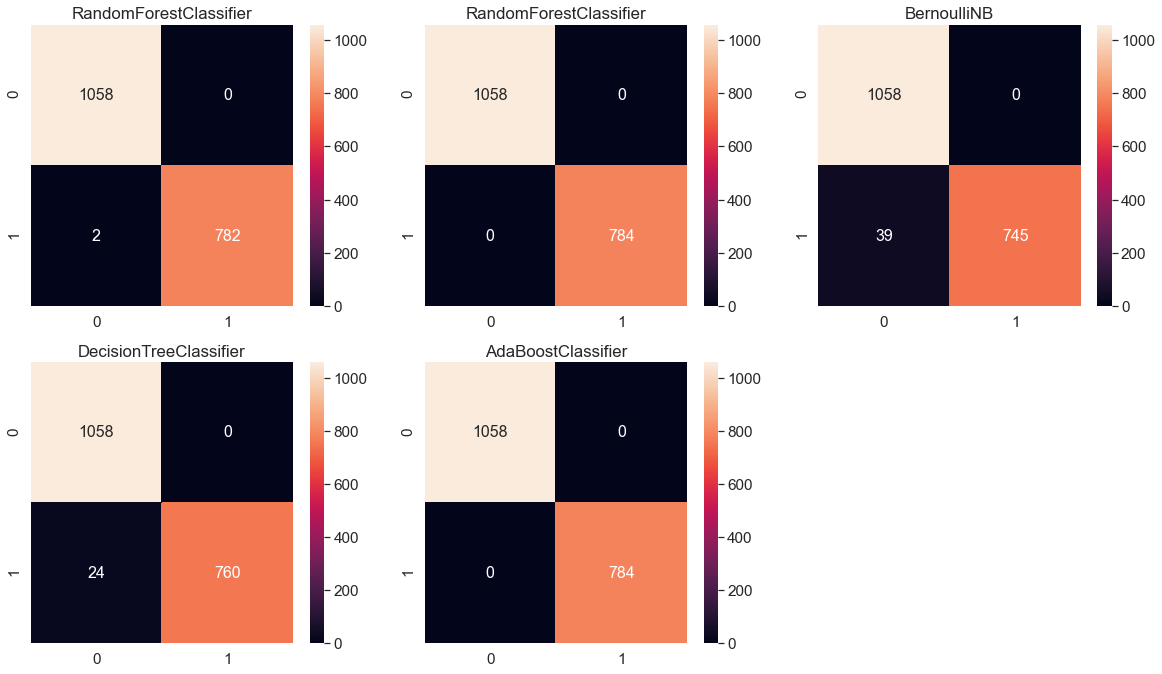

In [48]:
plt.figure(figsize = (20,30))  # width, height
for i in range(len(classifiers6)):
    s = str(classifiers6[i]).find('(')
    conf_matr = confusion_matrix(y6, train_preds6[i])
    plt.subplot(5, 3, i+1)
    plt.title(str(classifiers6[i])[:s])
    # plt.tight_layout()
    cm_df = pd.DataFrame(conf_matr, index = ['0','1'], columns = ['0','1'])
    seaborn.set(font_scale=1.4)
    seaborn.heatmap(cm_df, fmt='.0f', annot=True, annot_kws={"size": 16})

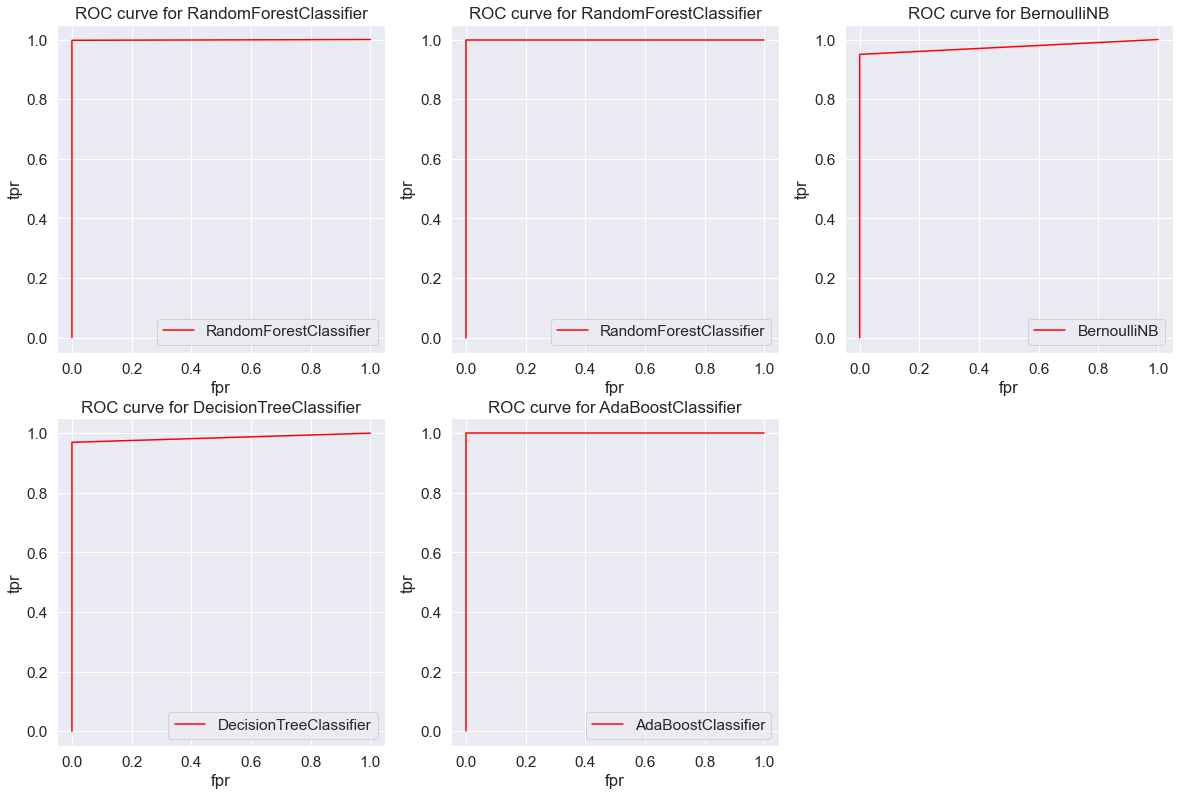

In [49]:
plt.figure(figsize=(20,35))
for i in range(len(classifiers6)):
    s = str(classifiers6[i]).find('(')
    title = 'ROC curve for '+str(classifiers6[i])[:s]
    fpr, tpr, _ = roc_curve(y_true=y6, y_score=train_preds6[i], drop_intermediate=False)
    plt.subplot(5, 3, i+1)
    plt.plot(fpr, tpr, color='red', label=str(classifiers6[i])[:s])
    plt.legend(loc='lower right')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(title)
plt.show()

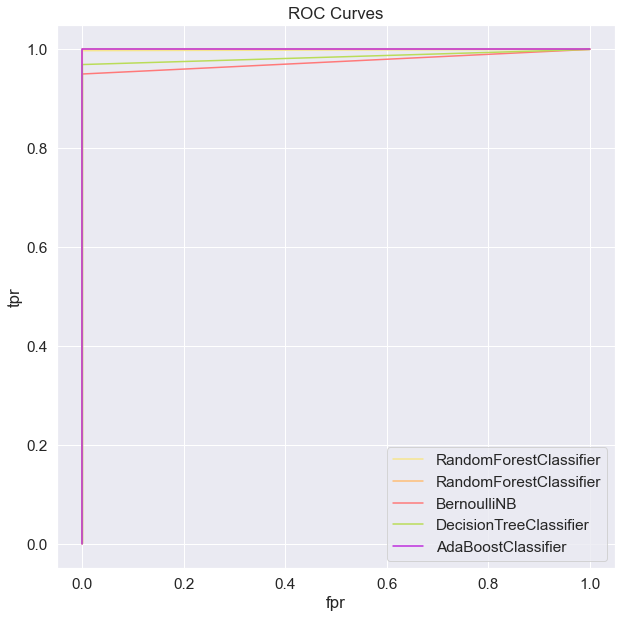

In [50]:
colors = ['#f6e58d', '#ffbe76', '#ff7979', '#badc58', '#be2edd', '#f9ca24', '#f0932b', '#eb4d4b', '#6ab04c', 
         '#c7ecee', '#7ed6df', '#2ed573', '#686de0', '#30336b', '#130f40', '#12CBC4']
plt.figure(figsize=(10,10))
for i in range(len(classifiers6)):
    s = str(classifiers6[i]).find('(')
    fpr, tpr, _ = roc_curve(y_true=y6, y_score=train_preds6[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color=colors[i], label=str(classifiers6[i])[:s])
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("ROC Curves")
plt.show()

In [61]:
given_link = "https://www.instagram.com/p/5uvYxcgsYL"
try:
    post = scrape_post_from_link(given_link)
except Exception as e:
    print(e)
given_df = [given_link]
for j in post[0].values():
    given_df += [j]

given_df = pd.DataFrame([given_df], columns=['Link']+list(post[0].keys()))

mentions_cap = []
hashtags_cap = []
verified_user_commented = []
username_full_name = []
location_in_post = []
verified_user_tagged = []
dollar_in_caption = []

mentions_cap += [len(given_df['mentions_cap'][0])]
hashtags_cap += [len(given_df['hashtags_cap'][0])]
if True in list(given_df['comment_users_verified'][0]):
    verified_user_commented += [1]
else:
    verified_user_commented += [0]
if str(given_df['user_name'][0]).strip().lower() == str(given_df['user_full_name'][0]).strip().lower():
    username_full_name += [1]
else:
    username_full_name += [0]
if given_df['location'][0] is None:
    location_in_post += [0]
else:
    location_in_post += [1]
if True in list(given_df['tagged_user_verified'][0]):
    verified_user_tagged += [1]
else:
    verified_user_tagged += [0]
if '$' in given_df['caption'][0]:
    dollar_in_caption += [1]
else:
    dollar_in_caption += [0]
    
given_df = given_df.drop(columns=['Link', 'hashtags_cap', 'mentions_cap', 'shortcode', 'photo_url', 
                                  'comment_users', 'comment_texts', 'comment_users_verified', 
                                  'comment_texts_processed', 'post_url', 'user_full_name', 
                                  'user_profile_pic_url', 'location', 'datetime', 'tagged_usernames', 
                                  'tagged_user_full_name', 'tagged_user_verified', 'hashtags_img',
                                  'mentions_img', 'image_text', 'image_text_processed'])
given_df['mentions_cap'] = mentions_cap
given_df['hashtags_cap'] = hashtags_cap
given_df['verified_user_commented'] = verified_user_commented
given_df['username_fullname'] = username_full_name
given_df['loc_in_post'] = location_in_post
given_df['verified_user_tagged'] = verified_user_tagged
given_df['dollar_in_caption'] = dollar_in_caption

given_df['user_verified'] = given_df['user_verified'].astype(int)
given_df['user_private'] = given_df['user_private'].astype(int)
given_df['is_ad'] = given_df['is_ad'].astype(int)
given_df['is_video'] = given_df['is_video'].astype(int)
given_df['comments_disabled'] = given_df['comments_disabled'].astype(int)

given_df

caption              post_id  \
0  Avocados are only $.79 each this week! What's ...  1039976974514308619   

          user_name    user_id  user_verified  user_private  user_post_count  \
0  superkingmarkets  239205176              0             0             1632   

   is_ad  is_video   timestamp  comments_disabled  likes  comments  \
0      0         0  1438194937                  0   2176         2   

   mentions_cap  hashtags_cap  verified_user_commented  username_fullname  \
0             0            11                        0                  0   

   loc_in_post  verified_user_tagged  dollar_in_caption  
0            0                     0                  1

In [67]:
arr = []
arr2 = vectorizer6_1.transform(given_df['caption']).toarray()
arr += arr2[0].tolist()
# print(len(arr2[0]))

arr2 = vectorizer6_2.transform(given_df['user_name']).toarray()
arr += arr2[0].tolist()
# print(len(arr2[0]))
given_df_train = pd.DataFrame([arr])

for i in given_df.columns:
    if i != 'user_name' and i != 'caption':
        given_df_train[i] = given_df[i]
# given_df_train

result = []
for i in classifiers6:
    result += list(i.predict(given_df_train))
print(result)
print(sum(result)/len(result))

[1, 1, 1, 1, 1]
1.0
